# Introduction
This is some analysis on the pump station data received

In [4]:
import pandas as pd
import numpy as np

# import the files
csoa = pd.read_excel('DC_Data.xlsx', sheet_name='CSO_A')
spsa1 = pd.read_excel('DC_Data.xlsx', sheet_name='SPS_A1')
spsa2 = pd.read_excel('DC_Data.xlsx', sheet_name='SPS_A2')
rga = pd.read_excel('DC_Data.xlsx', sheet_name='RG_A')

Quick check on the imported data

In [5]:
rga.head()

time  RG_A
0 2017-06-10 00:00:00   0.0
1 2017-06-10 00:15:00   0.0
2 2017-06-10 00:30:00   0.0
3 2017-06-10 00:45:00   0.0
4 2017-06-10 01:00:00   0.0

Decomposing the dateTime column to give some useful projections 

In [ ]:
# refine the dataTime column using df['date'] = pd.to_datetime(df['date'])
csoa['DateTime'] = pd.to_datetime(csoa['DateTime'])
spsa1['Timestamp'] = pd.to_datetime(spsa1['Timestamp'])
spsa2['Timestamp'] = pd.to_datetime(spsa2['Timestamp'])
rga['time'] = pd.to_datetime(rga['time'])

# add the year, month, day, hour and minutes-from-midnight
#csoa
csoa['Year'] = csoa['DateTime'].dt.year
csoa['Month'] = csoa['DateTime'].dt.month
csoa['Day'] = csoa['DateTime'].dt.day
csoa['Hour'] = csoa['DateTime'].dt.hour
csoa['Weekday'] = csoa['DateTime'].dt.weekday
csoa['DayType'] = csoa['DateTime'].dt.weekday.map({0: 'WeekDay', 1: 'WeekDay', 2: 'WeekDay', 3: 'WeekDay', 4: 'WeekDay', 5: 'WeekEnd', 6: 'WeekEnd'})
csoa['MinuteFromMidnight'] = csoa['DateTime'].dt.hour * 60 + csoa['DateTime'].dt.minute
#get list of bank holidays

'''
7th May 	Monday 	May Day
28th May 	Monday 	Bank Holiday
27th August 	Monday 	Bank Holiday
25th December 	Tuesday 	Christmas Day
26th December 	Wednesday 	Boxing Day
'''
# Weekday bank holidays
bankHolidays = pd.DataFrame({
   'Date': ['2017-01-02','2017-04-14', '2017-04-17', '2017-05-01','2017-05-29','2017-08-28','2017-12-25','2017-12-26','2018-01-01','2018-03-30','2018-04-02','2018-05-07'],
   'DayOfWeek': ['Monday','Friday',  'Monday','Monday','Monday','Monday','Monday','Tuesday','Monday','Friday','Monday','Monday'],
   'BankHoliday': ['New Year\'s Day','Good Friday', 'Easter Monday','May Day','Bank Holiday','Bank Holiday','Christmas Day','Boxing Day','New Year\'s Day','Good Friday','Easter Monday','May Day']
})
bankHolidays['Date'] = pd.to_datetime(bankHolidays['Date'])
bankHolidays['Year'] = bankHolidays['Date'].dt.year
bankHolidays['Month'] = bankHolidays['Date'].dt.month
bankHolidays['Day'] = bankHolidays['Date'].dt.day

#spsa1
spsa1['Year'] = spsa1['Timestamp'].dt.year
spsa1['Month'] = spsa1['Timestamp'].dt.month
spsa1['Day'] = spsa1['Timestamp'].dt.day
spsa1['Hour'] = spsa1['Timestamp'].dt.hour
spsa1['MinuteFromMidnight'] = spsa1['Timestamp'].dt.hour * 60 + spsa1['Timestamp'].dt.minute

#spsa2
spsa2['Year'] = spsa2['Timestamp'].dt.year
spsa2['Month'] = spsa2['Timestamp'].dt.month
spsa2['Day'] = spsa2['Timestamp'].dt.day
spsa2['Hour'] = spsa2['Timestamp'].dt.hour
spsa2['MinuteFromMidnight'] = spsa2['Timestamp'].dt.hour * 60 + spsa2['Timestamp'].dt.minute

#rga
rga['Year'] = rga['time'].dt.year
rga['Month'] = rga['time'].dt.month
rga['Day'] = rga['time'].dt.day
rga['Hour'] = rga['time'].dt.hour
rga['MinuteFromMidnight'] = rga['time'].dt.hour * 60 + rga['time'].dt.minute 

In [206]:
# check data types
bankHolidays

Date DayOfWeek     BankHoliday  Year  Month  Day
0  2017-01-02    Monday  New Year's Day  2017      1    2
1  2017-04-14    Friday     Good Friday  2017      4   14
2  2017-04-17    Monday   Easter Monday  2017      4   17
3  2017-05-01    Monday         May Day  2017      5    1
4  2017-05-29    Monday    Bank Holiday  2017      5   29
5  2017-08-28    Monday    Bank Holiday  2017      8   28
6  2017-12-25    Monday   Christmas Day  2017     12   25
7  2017-12-26   Tuesday      Boxing Day  2017     12   26
8  2018-01-01    Monday  New Year's Day  2018      1    1
9  2018-03-30    Friday     Good Friday  2018      3   30
10 2018-04-02    Monday   Easter Monday  2018      4    2
11 2018-05-07    Monday         May Day  2018      5    7

In [7]:
# describe
csoa.describe()

DateTime          Level           Year  \
count                         525600  525600.000000  525600.000000   
mean   2017-09-30 11:59:52.326028544      13.990715    2017.246577   
min              2017-04-01 00:00:00       0.000000    2017.000000   
25%              2017-07-01 05:59:45       6.495725    2017.000000   
50%              2017-09-30 11:59:30      12.185590    2017.000000   
75%              2017-12-30 18:00:15      18.266174    2017.000000   
max              2018-04-01 00:00:00      69.108658    2018.000000   
std                              NaN      10.548879       0.431019   

               Month            Day           Hour        Weekday  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        6.526014      15.720516      11.500084       3.005481   
min         1.000000       1.000000       0.000000       0.000000   
25%         4.000000       8.000000       5.000000       1.000000   
50%         7.000000      16.000000      11.000000       3.000000   
75%        10.000000      23.000000      17.250000       5.000000   
max        12.000000      31.000000      23.000000       6.000000   
std         3.447851       8.796278       6.922044       1.999997   

       MinuteFromMidnight  
count       525600.000000  
mean           719.504977  
min              0.000000  
25%            359.000000  
50%            719.000000  
75%           1079.250000  
max           1439.000000  
std            415.683627

In [8]:
## add the bank holidays to the csoa data
csoa = pd.merge(csoa, bankHolidays[["Year", "Month","Day","BankHoliday"]], how="left", on=["Year", "Month","Day"])
csoa['IsBankHoliday'] = csoa.apply(lambda x:  0 if pd.isnull(x['BankHoliday'])   else 1 , axis=1)
csoa['IsUsualBusinessDay'] = csoa.apply(lambda x:  1 if  pd.isnull(x['BankHoliday']) and (x['Weekday'] < 5)  else 0 , axis=1)

Joining the other data to the csoa data

In [9]:
## now join the other info to the cosa data
combnData = pd.merge(csoa, spsa1[["Year", "Month","Day","Hour","MinuteFromMidnight","Status","StateDesc"]], how="left", on=["Year", "Month","Day","Hour","MinuteFromMidnight"])
combnData.rename(columns={'Status': 'StatusSpsa1', 'StateDesc': 'StatusDecSpsa1'}, inplace=True)
## spsa2
combnData = pd.merge(combnData, spsa2[["Year", "Month","Day","Hour","MinuteFromMidnight","Status","StateDesc"]], how="left", on=["Year", "Month","Day","Hour","MinuteFromMidnight"])
combnData.rename(columns={'Status': 'StatusSpsa2', 'StateDesc': 'StatusDecSpsa2'}, inplace=True)
## rga
combnData = pd.merge(combnData, rga[["Year", "Month","Day","Hour","MinuteFromMidnight","RG_A"]], how="left", on=["Year", "Month","Day","Hour","MinuteFromMidnight"])
#combnData

In [81]:
# define a function to check and summarise the combined data frame
def mySummarise(main_df):
    df = main_df.copy()    
    nonZeroLevels = df.loc[  df['Level'] > 0   , :].shape[0]
    zeroLevels = df.loc[  df['Level'] == 0   , :].shape[0]
    #Spsa1
    zeroSpsa1 = df.loc[  df['StatusSpsa1'] == 0   , :].shape[0]
    oneSpsa1 = df.loc[  df['StatusSpsa1'] == 1   , :].shape[0]
    nullSpsa1 = df.loc[  pd.isnull(df['StatusSpsa1'] )  , :].shape[0]
    #Spsa2
    zeroSpsa2 = df.loc[  df['StatusSpsa2'] == 0   , :].shape[0]
    oneSpsa2 = df.loc[  df['StatusSpsa2'] == 1   , :].shape[0]
    nullSpsa2 = df.loc[  pd.isnull(df['StatusSpsa2'] )  , :].shape[0]
    #rga 
    rgaNonZero = df.loc[  df['RG_A_New'] > 0.0   , :].shape[0] if 'RG_A_New' in df.columns else  df.loc[df['RG_A'] > 0.0   , :].shape[0]
    # initialize data of lists.
    data = {'Description': ['RowCount' , 'NonZeroLevels','ZeroLevels' , 'Spsa1Zeroes', 'Spsa1Ones', 'Spsa1Nulls', 'Spsa2Zeroes', 'Spsa2Ones', 'Spsa2Nulls','RgaNonZero'],
            'Value': [df.shape[0] , nonZeroLevels, zeroLevels,zeroSpsa1, oneSpsa1, nullSpsa1,zeroSpsa2, oneSpsa2, nullSpsa2,rgaNonZero]}
    return pd.DataFrame(data)

In [10]:
mySummarise(combnData)

Description   Value
0       RowCount  525600
1  NonZeroLevels  517508
2     ZeroLevels    8092
3    Spsa1Zeroes     733
4      Spsa1Ones     733
5     Spsa1Nulls  524134
6    Spsa2Zeroes     732
7      Spsa2Ones     732
8     Spsa2Nulls  524136
9     RgaNonZero    1930

Interpolating the 0 values, deemed to be missing,  in the csoa data

In [ ]:
## replace the zero levels in the csoa data with a linearerly interpolated value
def interpoloteLevels(main_df):
    ttp = main_df['Level']
    ttp.replace(0, np.nan, inplace=True)
    ttp = ttp.interpolate(method = 'slinear') 
    main_df['Level'] = ttp
interpoloteLevels(combnData)
mySummarise(combnData)

Description   Value
0       RowCount  525600
1  NonZeroLevels  525600
2     ZeroLevels       0
3    Spsa1Zeroes     733
4      Spsa1Ones     733
5     Spsa1Nulls  524134
6    Spsa2Zeroes     732
7      Spsa2Ones     732
8     Spsa2Nulls  524136
9     RgaNonZero    1930

Given that the status of a pump remain in its current state until the status changes, we shall update status descriptions at each minute to show its current state.  This process takes a while, so the result is added to the spreadsheet and retrived if it already exists

In [ ]:
'''
Updates the status descriptions at the seweage pumps - the previous status is propogated through 
each minute until it changes. N/As are ignored. 

This process takes at least 10 minutes (depending on the machine), so the updated version has been 
added to the input spreadsheet if it is not already there, otherwise it is read from the spreadsheet. 

'''
try:
    combnDataNew = pd.read_excel('DC_Data.xlsx', sheet_name='combnDataNew')
except:
    combnDataNew =pd.DataFrame()
    previousRow = combnData.loc[0, :]
    for year in [2017,2018] :
        for month in range(1,13) :
            for day in range(1,32):
                dfTest =  combnData.loc[(combnData['Year'] == year) & (combnData['Month'] == month) & (combnData['Day'] == day), :]
                dfTest = dfTest.reset_index()  # make sure indexes pair with number of rows
                for index in range(len(dfTest)) : 
                    previousTime = pd.to_datetime(dfTest.loc[index - 1, 'DateTime']) if (index > 0) else previousRow['DateTime'] 
                    currentTime = pd.to_datetime(dfTest.loc[index, 'DateTime'])
                    timeDiff = pd.Timedelta(currentTime - previousTime).total_seconds() / 60.0
                    if (timeDiff > 0) : 
                        ## update the sewage pump 1
                        if dfTest.isnull().loc[index, 'StatusSpsa1'] and (pd.isnull(previousRow['StatusSpsa1']) == False) : 
                            dfTest.loc[index, 'StatusSpsa1'] =  previousRow['StatusSpsa1']
                            dfTest.loc[index, 'StatusDecSpsa1'] =  previousRow['StatusDecSpsa1']
                        ## update the sewage pump 1
                        if dfTest.isnull().loc[index, 'StatusSpsa2'] and (pd.isnull(previousRow['StatusSpsa2']) == False) : 
                            dfTest.loc[index, 'StatusSpsa2'] =  previousRow['StatusSpsa2']
                            dfTest.loc[index, 'StatusDecSpsa2'] =  previousRow['StatusDecSpsa2']                    
                    previousRow = dfTest.loc[index]
                combnDataNew = pd.concat([combnDataNew,dfTest],ignore_index=True)
                if (len(dfTest) > 0) :
                    # check the progress of the updates
                    print('Completed: ' + str(day) + '_' + str(month) +'_' + str(year) )
    ## write to the sheet
    with pd.ExcelWriter('DC_Data.xlsx', mode='a', engine='openpyxl', if_sheet_exists='new') as writer:
        combnDataNew.to_excel(writer, sheet_name='combnDataNew', index=False)
## show the summary when the data is loaded - Spsa1Ones and Spsa2Ones should increase from the previous step
mySummarise(combnDataNew)

Description   Value
0       RowCount  525600
1  NonZeroLevels  525600
2     ZeroLevels       0
3    Spsa1Zeroes  489168
4      Spsa1Ones    3085
5     Spsa1Nulls   33347
6    Spsa2Zeroes  489137
7      Spsa2Ones    3102
8     Spsa2Nulls   33361
9     RgaNonZero    1930

In [83]:
''' 
Interpolates the RG_A status wihtin successive 15-minute for which there is data. 
Takes a few minutes to run
'''
combnDataNew = combnDataNew.reset_index()
combnDataNew['RG_A_New'] = combnDataNew['RG_A'].astype(float)

for index in range(len(combnDataNew)): 
    currentTime = pd.to_datetime(combnDataNew.loc[index, 'DateTime'])                
    try: 
        nextTime = pd.to_datetime(combnDataNew.loc[index + 15, 'DateTime'])
        timeDiff = pd.Timedelta(nextTime - currentTime).total_seconds() / 60.0
        if (combnDataNew.loc[index, 'RG_A_New'] > 0.0) and (combnDataNew.loc[index + 15, 'RG_A_New'] > 0.0) and (timeDiff > 14.85):
            valueStart = combnDataNew.loc[index, 'RG_A_New']
            valueEnd = combnDataNew.loc[index + 15, 'RG_A_New']
            increment = 0 if (valueStart == valueEnd) else  (valueEnd  - valueStart) / 15
            num = combnDataNew['RG_A_New'].sum()
            if (index > 500000) & ((index % 75) == 0):
                print('Updating index ' + str(index + 1) + ' to ' + str(index + 14) + ' --- ' + str(num) )
            for nxt in range (index + 1,index + 15):
                combnDataNew.loc[nxt, 'RG_A_New'] =  combnDataNew.loc[nxt - 1, 'RG_A_New'] + increment
            index = index + 15
    except:
        continue
# chech the results - the RgsNonZero value shouls increase from the previous step
mySummarise(combnDataNew)

Description   Value
0       RowCount  525600
1  NonZeroLevels  525600
2     ZeroLevels       0
3    Spsa1Zeroes  489168
4      Spsa1Ones    3085
5     Spsa1Nulls   33347
6    Spsa2Zeroes  489137
7      Spsa2Ones    3102
8     Spsa2Nulls   33361
9     RgaNonZero   17106

# Analysis 
First we chack that the rainfall interpolation worked

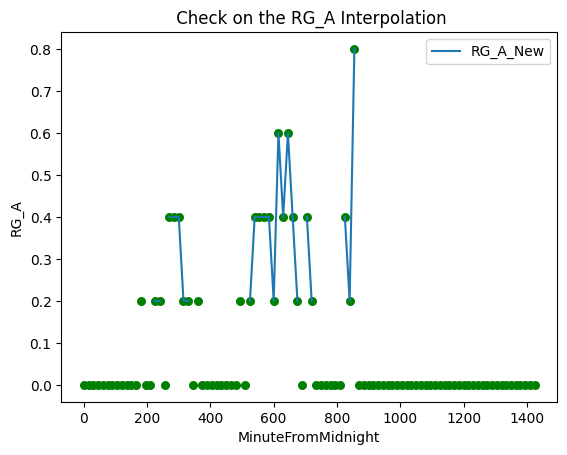

In [84]:
#check on the rainfall interpolation from the previous step
import matplotlib.pyplot as plt

def checkRGInterpoloation(year,month,day): 
    ax = plt.gca()
    plotData = combnDataNew.loc[(combnDataNew['Year'] == year) & (combnDataNew['Month'] == month) & (combnDataNew['Day'] == day)  , :]
    plotData.plot( x = 'MinuteFromMidnight' , y = 'RG_A_New',ax = ax)
    plotData.plot(kind = 'scatter', x = 'MinuteFromMidnight' , y = 'RG_A', title = ' Check on the RG_A Interpolation' , color='g', linewidths=2,ax = ax )
## generate plot on selected year, month & day
checkRGInterpoloation(2018,1,15)

Next we look at some profiles from the CSO_A data

In [ ]:
#get some profiles of the overflow data
import datetime
  
def plotWeekFromDate(year = 2017, month = 4, day = 1, numWeeks = 4): #year,month,day) :
    fig, ax = plt.subplots(numWeeks, 2,sharey=True)
    fig.set_figheight(22)
    fig.set_figwidth(25)
    days_of_the_week = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
    colours = ['red','orchid','steelblue','orange','seagreen','salmon','dimgrey']
    xs = [ i for i in range(0,1440)]    
    originalDate = datetime.datetime(year, month, day) 
    for wk in range (0,numWeeks):
        initialDate = originalDate +  datetime.timedelta(days = wk * 7)
        year,month,day = initialDate.year , initialDate.month , initialDate.day
        for date in [initialDate +  datetime.timedelta(days= d) for d in range(0,7)]: 
            day_of_the_week = date.weekday()
            label_value = days_of_the_week[day_of_the_week] 
            rows, columns = bankHolidays.loc[(bankHolidays['Year'] == date.year) & (bankHolidays['Month'] == date.month) & (bankHolidays['Day'] == date.day)  , :].shape
            values = combnDataNew.loc[(combnDataNew['Year'] == year) & (combnDataNew['Month'] == month) & (combnDataNew['Day'] == 1 + day_of_the_week)  , ['Level']]
            if  (day_of_the_week < 5) and (rows == 0)  :    
            #if  (rows == 0)  :    
                ax[wk,0].plot(xs,values ,label= label_value,color=colours[day_of_the_week])
                ax[wk,0].legend(loc="upper left",ncol=5)
            else :
                ax[wk,1].plot(xs, values,label = label_value,color=colours[day_of_the_week])
                ax[wk,1].legend(loc="upper left",ncol=2)
        myDateString = ('0' if day < 10 else '') + str(day) + '/' + ('0' if month < 10 else '') + str(month) + '/' + str(year) 
        ax[wk,0].set_title('Usual Weekday Profiles for Week Beginning ' + myDateString)
        ax[wk,1].set_title('Weekend or Bank Holiday Profiles for Week Beginning ' + myDateString)

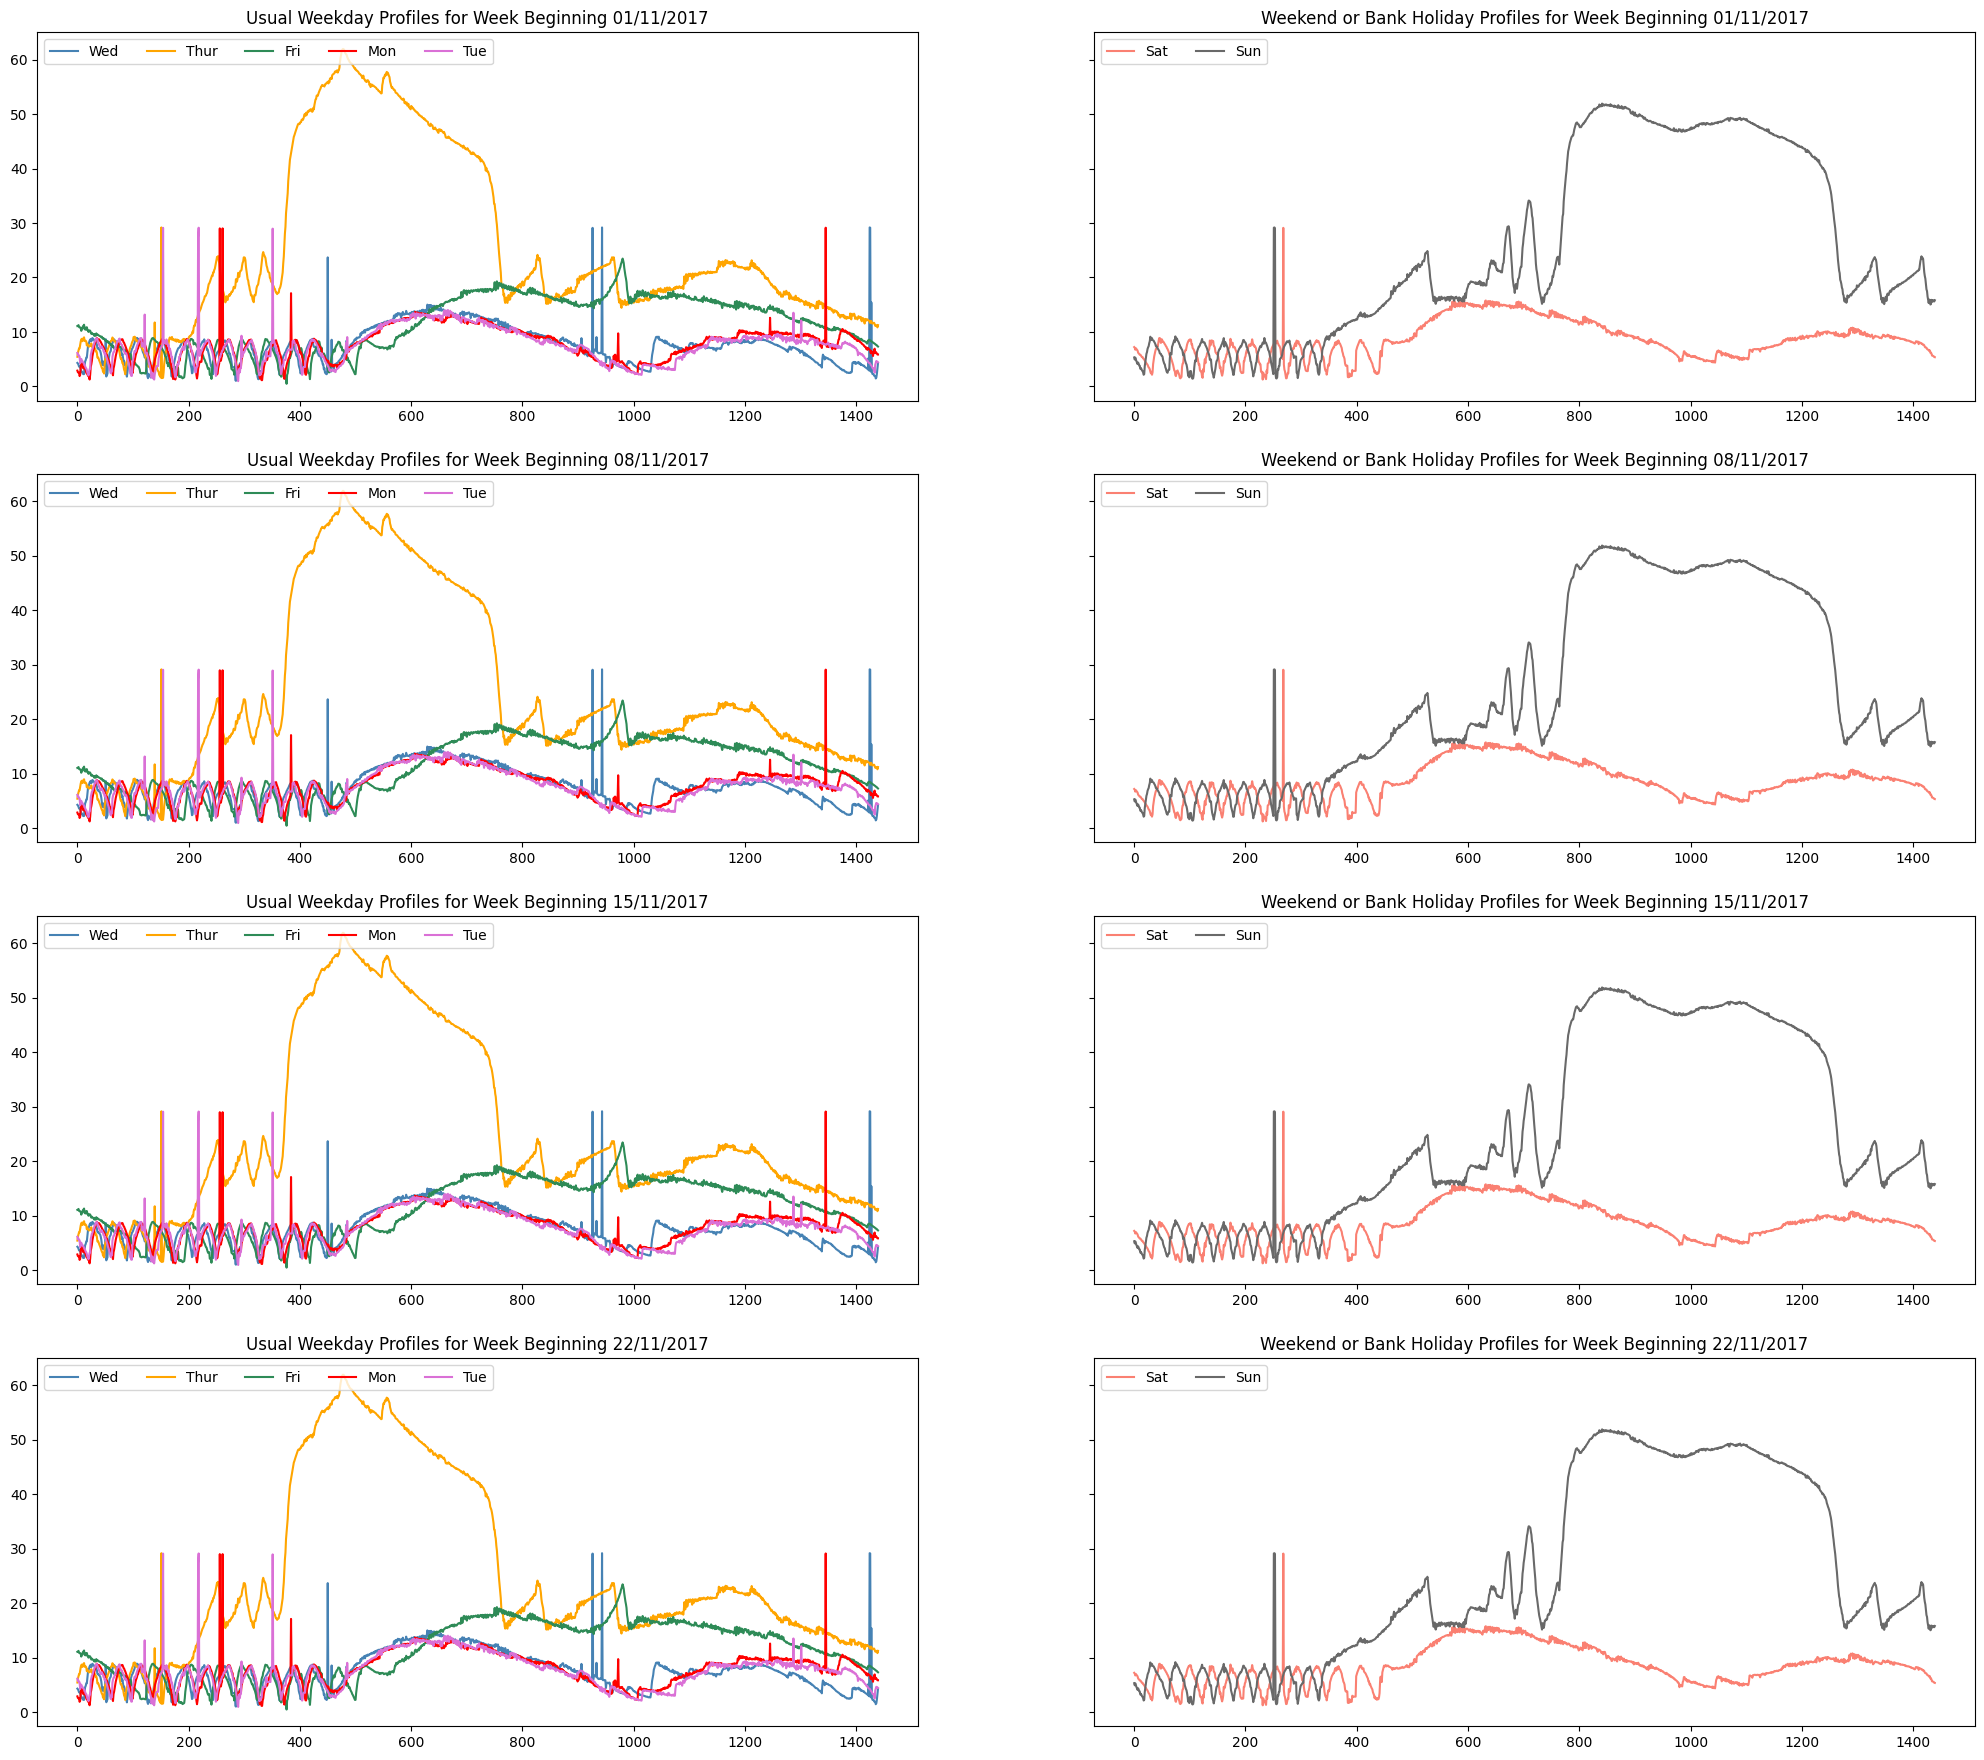

In [86]:
## November 2017
plotWeekFromDate(year = 2017,month = 11, day = 1)

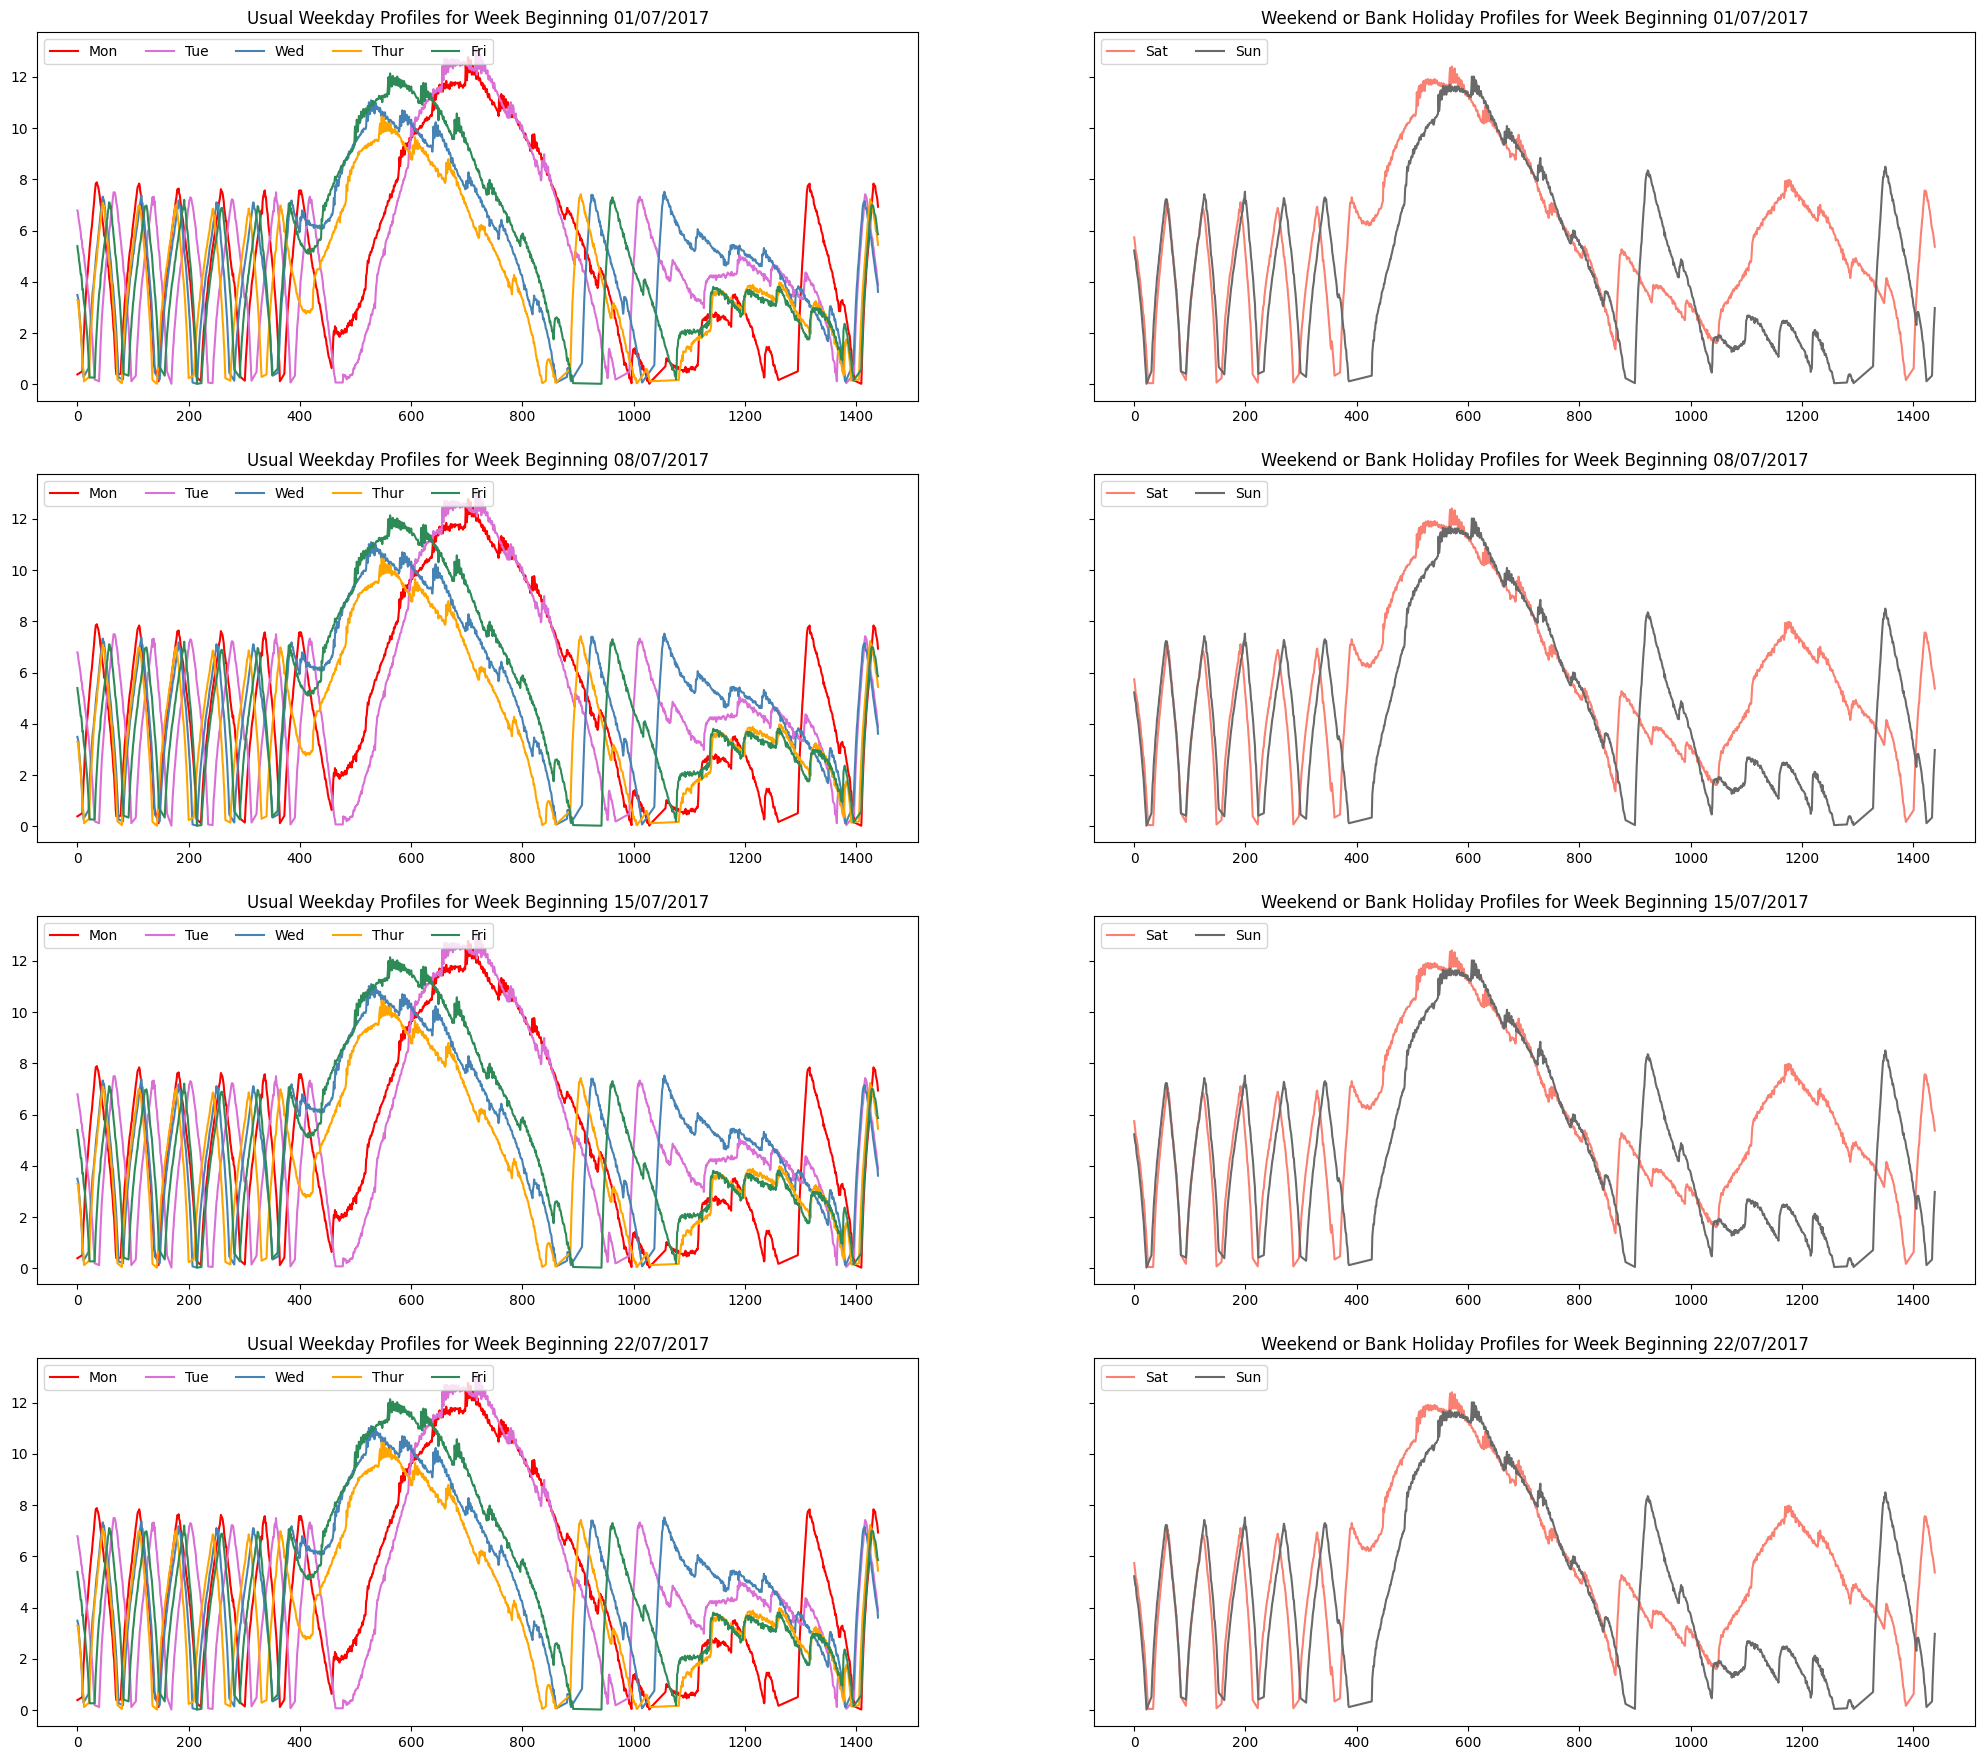

In [87]:
# July 2017
plotWeekFromDate(year = 2017,month = 7, day = 1)

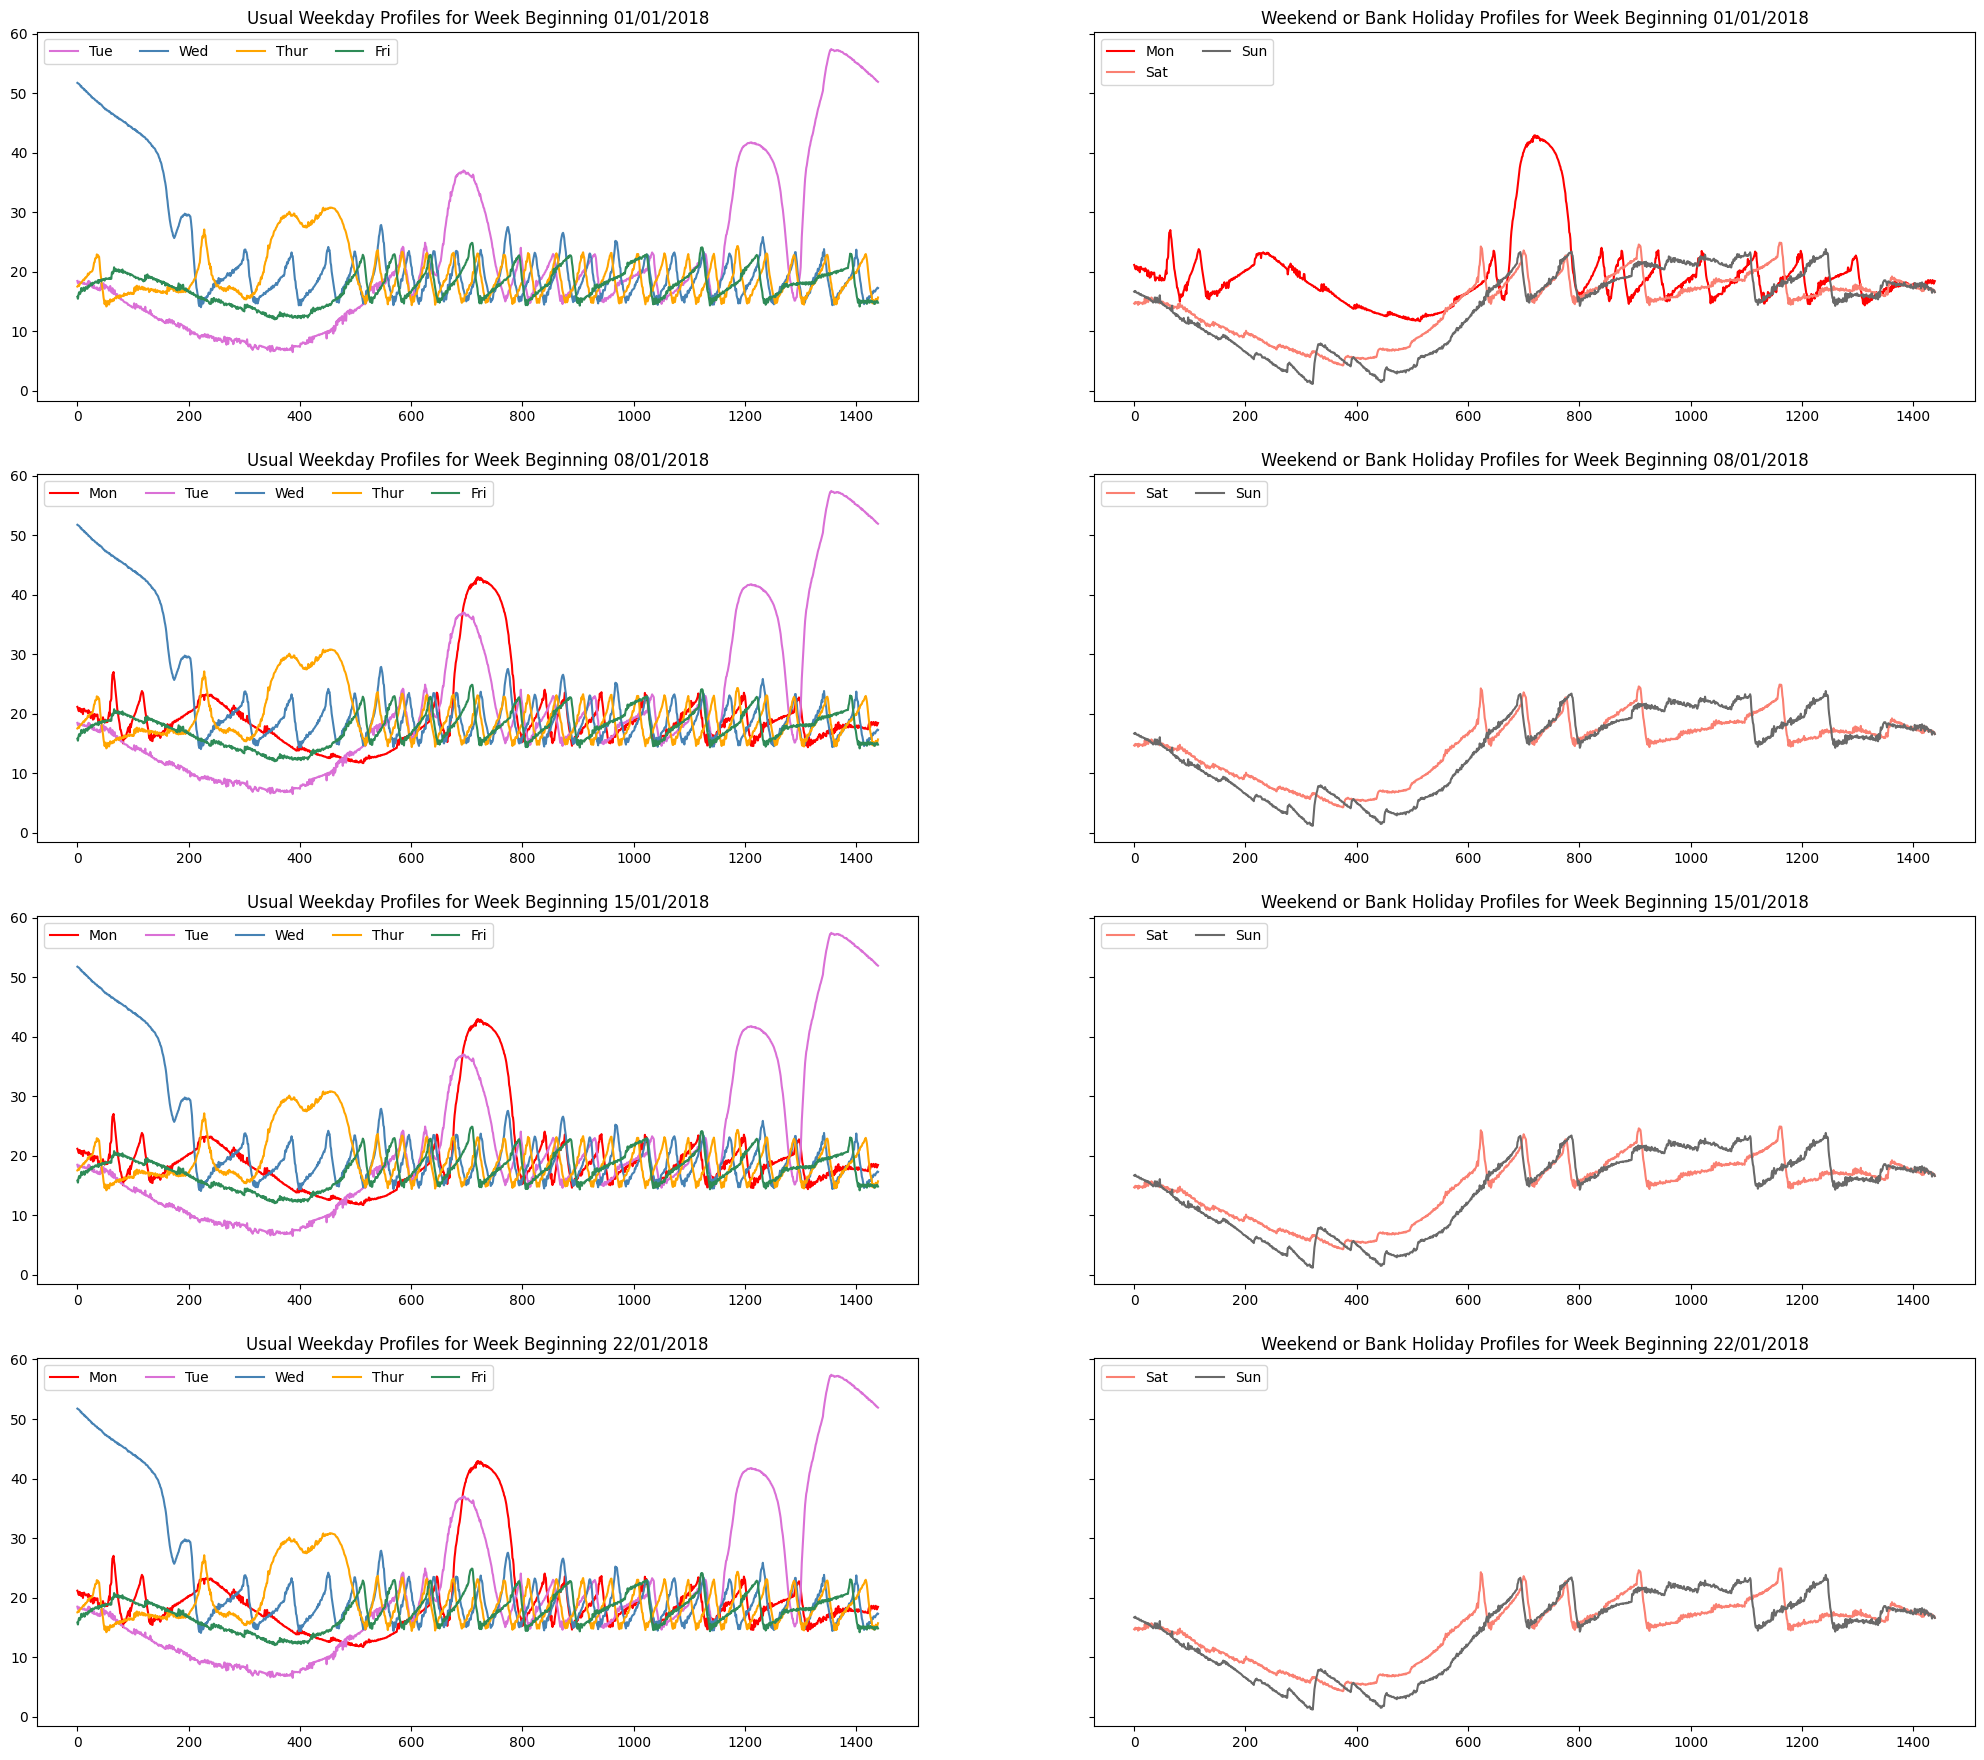

In [88]:
# January 2018
plotWeekFromDate(year = 2018,month = 1, day = 1)

------------------------------------------
From the plots above, we can see some unusual spikes in the profiles on certain days. For instance, on Tuesday of the month of January 2018 and Thursday and Sunday of the week beginning 27/1/2017. Given that the median is less susceptible to outliers that the mean, we can quickly identify where spikes are likely to occur by comparing the median deviation (i.e., a 'standard deviation' using the median instead of the mean) with the median. This comparison is done via the "median coefficient of variation" which is similar to the coefficient of variation (i.e., the standard deviation divided by the mean) but uses the median and the median deviation (i.e., the standard deviation calculated using the median instead of the mean). This is shown alongside the usual CoV and it can be clearly seen how the usual CoV is influenced by outliers whilst the median CoV is not. This is actually a more robust, analytical approach to identify outliers than exploratory techniques such as clustering. 

In [ ]:
## comparing coefficient of variations
import statistics
import math 

def medianDeviation(series):
    med = statistics.median(series )
    sumSqrdErrors =  sum([(vl - med)*(vl - med)  for vl in series]) 
    return math.sqrt(sumSqrdErrors / len(series) )
    
def estimateCoVs(sortdescending = False ):
    combnDataCoV = combnDataNew.groupby(['Year','Month','Weekday','Hour'])['Level'].aggregate(
                                                           Num = 'count',
                                                           Minimum = 'min',
                                                           Maximum = 'max',
                                                           Mean = 'mean',
                                                           StDev = 'std',
                                                           Median = 'median',
                                                           MedianDev = medianDeviation
                                                           ).reset_index()
    combnDataCoV['UsualCoV'] =  combnDataCoV['StDev'] / combnDataCoV['Mean'] 
    combnDataCoV['MedianCoV'] =  combnDataCoV['MedianDev'] / combnDataCoV['Median'] 
    if sortdescending :
        mouthsWithMax = combnDataCoV.groupby(['Year','Month'])['MedianCoV'].aggregate(
                                                               Maximum = 'max'
                                                               ).reset_index()
        mouthsWithMax = mouthsWithMax.sort_values(['Maximum'], ascending=[False]) 
        combnDataCoVsorted =pd.DataFrame()        
        for row in range (0,mouthsWithMax.shape[0]) :
            row_data = mouthsWithMax.iloc[[row]].values
            maxData = combnDataCoV.loc[(combnDataCoV['Year'] == row_data[0][0]) & (combnDataCoV['Month'] == row_data[0][1]) , :]
            combnDataCoVsorted = pd.concat([combnDataCoVsorted,maxData],ignore_index=True)
        combnDataCoVsorted = combnDataCoVsorted.reset_index()
        return combnDataCoVsorted
    else:
        return combnDataCoV
#==

In [90]:
combnDataCoV = estimateCoVs(sortdescending = True)
combnDataCoV.head(24)

index  Year  Month  Weekday  Hour  Num   Minimum    Maximum       Mean  \
0       0  2017      7        0     0  300  0.048840  20.952377   7.598737   
1       1  2017      7        0     1  300  0.122100  13.235650   5.709848   
2       2  2017      7        0     2  300  0.118915   8.717947   3.944375   
3       3  2017      7        0     3  300  0.024420   8.058606   3.804313   
4       4  2017      7        0     4  300  0.024420   8.131866   2.985213   
5       5  2017      7        0     5  300  0.024420   8.083026   4.140781   
6       6  2017      7        0     6  300  0.024420   8.083026   4.843670   
7       7  2017      7        0     7  300  0.244200  14.432231   7.610499   
8       8  2017      7        0     8  300  6.520145  21.855917  12.303945   
9       9  2017      7        0     9  300  8.742367  27.106222  15.468210   
10     10  2017      7        0    10  300  8.327227  28.131863  16.108096   
11     11  2017      7        0    11  300  7.057385  28.009762  14.672769   
12     12  2017      7        0    12  300  4.639804  25.079359  12.347983   
13     13  2017      7        0    13  300  0.927961  21.929176  10.079607   
14     14  2017      7        0    14  300  0.073260  39.120872  11.494926   
15     15  2017      7        0    15  300  0.421955  37.948711  12.189278   
16     16  2017      7        0    16  300  0.073260  22.246637   8.360660   
17     17  2017      7        0    17  300  0.048840  21.733818   9.030847   
18     18  2017      7        0    18  300  0.128675  23.956039   9.327372   
19     19  2017      7        0    19  300  1.123321  23.833939   9.645908   
20     20  2017      7        0    20  300  1.123321  22.539679   9.028732   
21     21  2017      7        0    21  300  0.073260  21.147738   7.904187   
22     22  2017      7        0    22  300  0.048840  19.023195   6.717906   
23     23  2017      7        0    23  300  0.048840  17.264954   7.356844   

        StDev     Median  MedianDev  UsualCoV  MedianCoV  
0    5.663388   6.324785   5.795689  0.745307   0.916346  
1    3.500355   5.592185   3.496496  0.613038   0.625247  
2    2.490644   4.273503   2.508178  0.631442   0.586914  
3    2.173153   3.980463   2.176667  0.571234   0.546838  
4    2.475885   2.722832   2.485642  0.829383   0.912889  
5    1.939104   4.285713   1.941287  0.468294   0.452967  
6    1.935559   5.079364   1.946652  0.399606   0.383247  
7    3.055070   6.739925   3.171788  0.401428   0.470597  
8    4.299065   9.768008   4.985111  0.349405   0.510351  
9    6.834579  10.354088   8.527016  0.441847   0.823541  
10   7.798453  10.622708   9.523793  0.484133   0.896550  
11   7.939682   9.194138   9.635550  0.541117   1.048010  
12   7.539519   7.106225   9.172289  0.610587   1.290740  
13   7.629561   5.079364   9.111454  0.756930   1.793818  
14  14.351010   2.417582  16.960636  1.248465   7.015538  
15  11.024151   6.886446  12.216662  0.904414   1.774016  
16   7.706272   4.004883   8.840897  0.921730   2.207529  
17   7.508933   6.776555   7.828024  0.831476   1.155163  
18   7.905539   5.641025   8.710820  0.847563   1.544191  
19   8.049852   5.213674   9.177625  0.834535   1.760299  
20   7.795723   4.871794   8.823313  0.863435   1.811102  
21   7.365468   3.614163   8.513142  0.931844   2.355495  
22   7.216172   2.490842   8.352702  1.074170   3.353365  
23   4.545686   6.630035   4.595937  0.617885   0.693200

We can now create plots to compare the median and mean CoVs 

In [91]:
import calendar
# Histograms with the CoV
def plotCoVs(year = 2017, month = 4 ,numDays = 7): #year,month,day) :
    fig, ax = plt.subplots(numDays, 2)
    fig.set_figheight(30)
    fig.set_figwidth(25)
    days_of_the_week = ['Mondays','Tuesdays','Wednesdays','Thursdays','Fridays','Saturdays','Sundays']
    list_of_months = list(calendar.month_name)[1:]
    hours = list(map(str, range(0,24)))
    # Bar width and x locations
    bar_width , xs = 0.4, np.arange(len(hours))
    plt.xticks(xs)#, hours)
    for weekday in range (0,numDays):
        medianCoV = combnDataCoV.loc[  (combnDataCoV['Year'] == year) & (combnDataCoV['Month'] == month)  & (combnDataCoV['Weekday'] == weekday) , ['MedianCoV']].values
        usualCoV = combnDataCoV.loc[  (combnDataCoV['Year'] == year) & (combnDataCoV['Month'] == month)  & (combnDataCoV['Weekday'] == weekday) , ['UsualCoV']].values
        median_vals = combnDataCoV.loc[  (combnDataCoV['Year'] == year) & (combnDataCoV['Month'] == month)  & (combnDataCoV['Weekday'] == weekday) , ['Median']]
        mean_vals = combnDataCoV.loc[  (combnDataCoV['Year'] == year) & (combnDataCoV['Month'] == month)  & (combnDataCoV['Weekday'] == weekday) , ['Mean']]
        #
        ax[weekday,0].bar(xs - bar_width / 2 ,[medianCoV[i,0] for i in range(0,24)], bar_width ,label= 'Median Cov',color='cadetblue')
        ax[weekday,0].bar(xs + bar_width / 2 ,[usualCoV[i,0] for i in range(0,24)], bar_width ,label= 'Usual Cov',color='lightgreen')
        ax[weekday,0].set_ylabel('CoV Value')
        ax[weekday,0].legend(loc="upper right",ncol=2)
        
        ## line graphs
        ax[weekday,1].plot(xs, median_vals,label = 'Median',color='cadetblue')
        ax[weekday,1].plot(xs, mean_vals,label ='Mean',color='lightgreen')
        ax[weekday,1].set_ylabel('Mean/Median Value')
        ax[weekday,1].legend(loc="upper right",ncol=2)
        #
        ax[weekday,0].set_title('Usual vs Median CoVs by Hour - ' + days_of_the_week[weekday] + ' in ' + list_of_months[month - 1] + ', ' + str(year) )
        ax[weekday,1].set_title('Weekday Mean and Median by Hour - ' + days_of_the_week[weekday] + ' in ' + list_of_months[month - 1] + ', ' + str(year))        

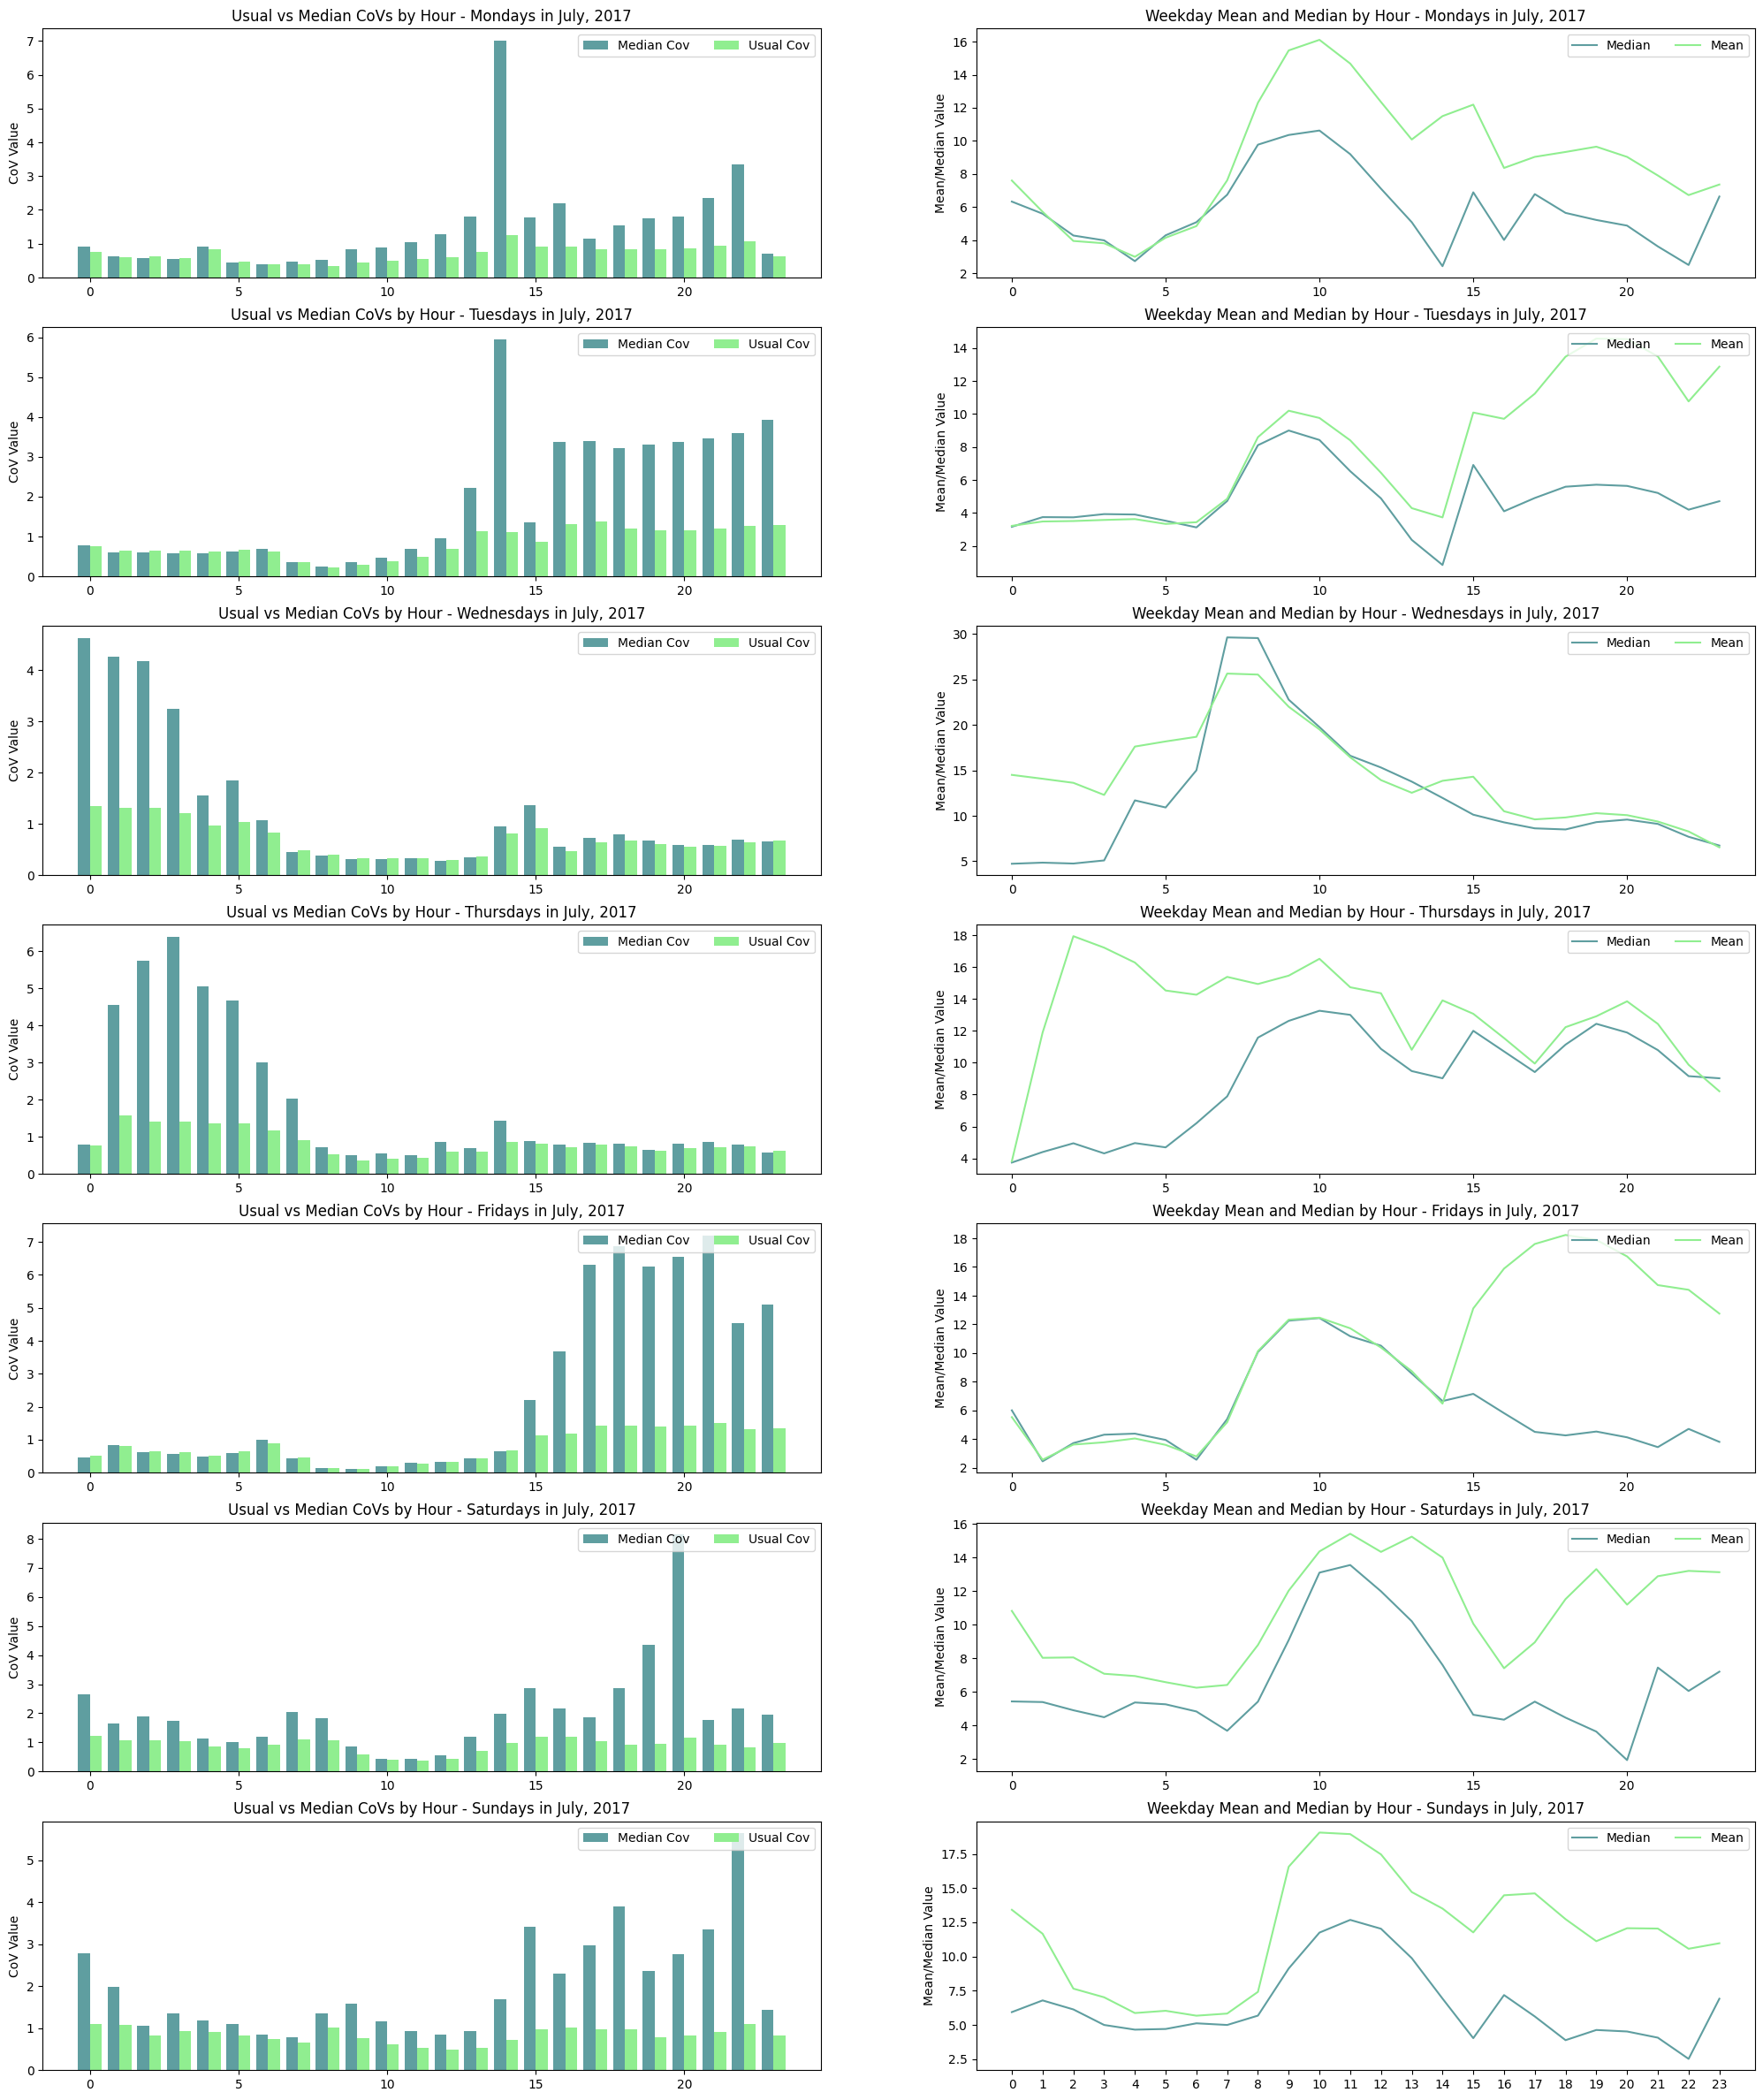

In [92]:
# plotting the month with the highest median cov
plotCoVs(2017,7)

### Looking at Pump Stations

In [93]:
#Pump station analysis - check flor levels when either or no pump is on
#Note, when pumpindex = 1 analysis in done only on StatusSpsa1. When it is 2 it is done on StatusSpsa1, otherwise on both
def pumpStationsCmp(main_df,pumpindex = 3): 
    df = main_df.copy() 
    df['StatusSpsa'] = df['StatusSpsa1'] if pumpindex == 1 else (df['StatusSpsa2'] if pumpindex == 2 else df[['StatusSpsa1', 'StatusSpsa2']].max(axis=1)  )
    df =  df.groupby(['Year','Month','Weekday','Hour' ,'MinuteFromMidnight','StatusSpsa'])['Level'].aggregate(
                                                             Num = 'count',
                                                             Level = 'mean',
                                                           ).reset_index()
    #
    tmp1 = df.loc[df['StatusSpsa'] == 0, :]
    tmp2 = df.loc[df['StatusSpsa'] == 1, :]
    tmp1.columns = ['Year','Month','Weekday','Hour','MinuteFromMidnight','StatusOff','NumOff','LevelOff']
    tmp2.columns = ['Year','Month','Weekday','Hour','MinuteFromMidnight','StatusRunning','NumOn','LevelRunning']
    result = pd.merge(tmp1, tmp2[["Year", "Month","Weekday","Hour" ,"MinuteFromMidnight","StatusRunning" ,"NumOn","LevelRunning"]], how="inner", on=["Year", "Month","Weekday","Hour","MinuteFromMidnight"])
    result['LevelGreaterRunning'] = [ 1 if (a  > b) else 0 for (a,b) in zip(result['LevelRunning'] , result['LevelOff'])]
    return result

In [94]:
# check a few
ttt = pumpStationsCmp(combnDataNew, pumpindex = 3)
ttt.loc[(ttt['Year'] == 2017) & (ttt['Month'] == 7) & (ttt['Weekday'] == 5), :]

Year  Month  Weekday  Hour  MinuteFromMidnight  StatusOff  NumOff  \
1715  2017      7        5     0                   1        0.0       4   
1716  2017      7        5     0                   2        0.0       4   
1717  2017      7        5     0                   3        0.0       4   
1718  2017      7        5     0                   4        0.0       4   
1719  2017      7        5     0                  10        0.0       4   
...    ...    ...      ...   ...                 ...        ...     ...   
1919  2017      7        5    14                 874        0.0       4   
1920  2017      7        5    14                 875        0.0       4   
1921  2017      7        5    14                 876        0.0       4   
1922  2017      7        5    14                 883        0.0       4   
1923  2017      7        5    14                 884        0.0       4   

      LevelOff  StatusRunning  NumOn  LevelRunning  LevelGreaterRunning  
1715  3.220729            1.0      1     40.122093                    1  
1716  3.388956            1.0      1     40.122093                    1  
1717  3.606023            1.0      1     40.048832                    1  
1718  3.694885            1.0      1     39.926731                    1  
1719  4.487179            1.0      1     39.291809                    1  
...        ...            ...    ...           ...                  ...  
1919  6.849815            1.0      1     41.074471                    1  
1920  6.764345            1.0      1     41.123314                    1  
1921  6.678875            1.0      1     41.074471                    1  
1922  6.556775            1.0      1     40.708172                    1  
1923  6.642245            1.0      1     40.610493                    1  

[209 rows x 12 columns]

In [95]:
ttt = pumpStationsCmp(combnDataNew)
ttt.loc[(ttt['Year'] == 2017) & (ttt['Month'] == 9) & (ttt['Weekday'] == 5), :]

Year  Month  Weekday  Hour  MinuteFromMidnight  StatusOff  NumOff  \
2552  2017      9        5    16                 999        0.0       4   
2553  2017      9        5    16                1000        0.0       4   
2554  2017      9        5    16                1001        0.0       4   
2555  2017      9        5    16                1002        0.0       4   
2556  2017      9        5    16                1010        0.0       4   
...    ...    ...      ...   ...                 ...        ...     ...   
2654  2017      9        5    23                1429        0.0       4   
2655  2017      9        5    23                1434        0.0       4   
2656  2017      9        5    23                1435        0.0       4   
2657  2017      9        5    23                1436        0.0       4   
2658  2017      9        5    23                1437        0.0       4   

      LevelOff  StatusRunning  NumOn  LevelRunning  LevelGreaterRunning  
2552  6.880340            1.0      1     20.634916                    1  
2553  6.776555            1.0      1     21.172157                    1  
2554  6.678875            1.0      1     21.733818                    1  
2555  6.752135            1.0      1     22.197798                    1  
2556  6.581195            1.0      1     19.267395                    1  
...        ...            ...    ...           ...                  ...  
2654  8.894992            1.0      1     17.338213                    1  
2655  9.468863            1.0      1     16.923073                    1  
2656  9.420022            1.0      1     16.507933                    1  
2657  9.407812            1.0      1     16.654453                    1  
2658  9.285712            1.0      1     16.800974                    1  

[107 rows x 12 columns]

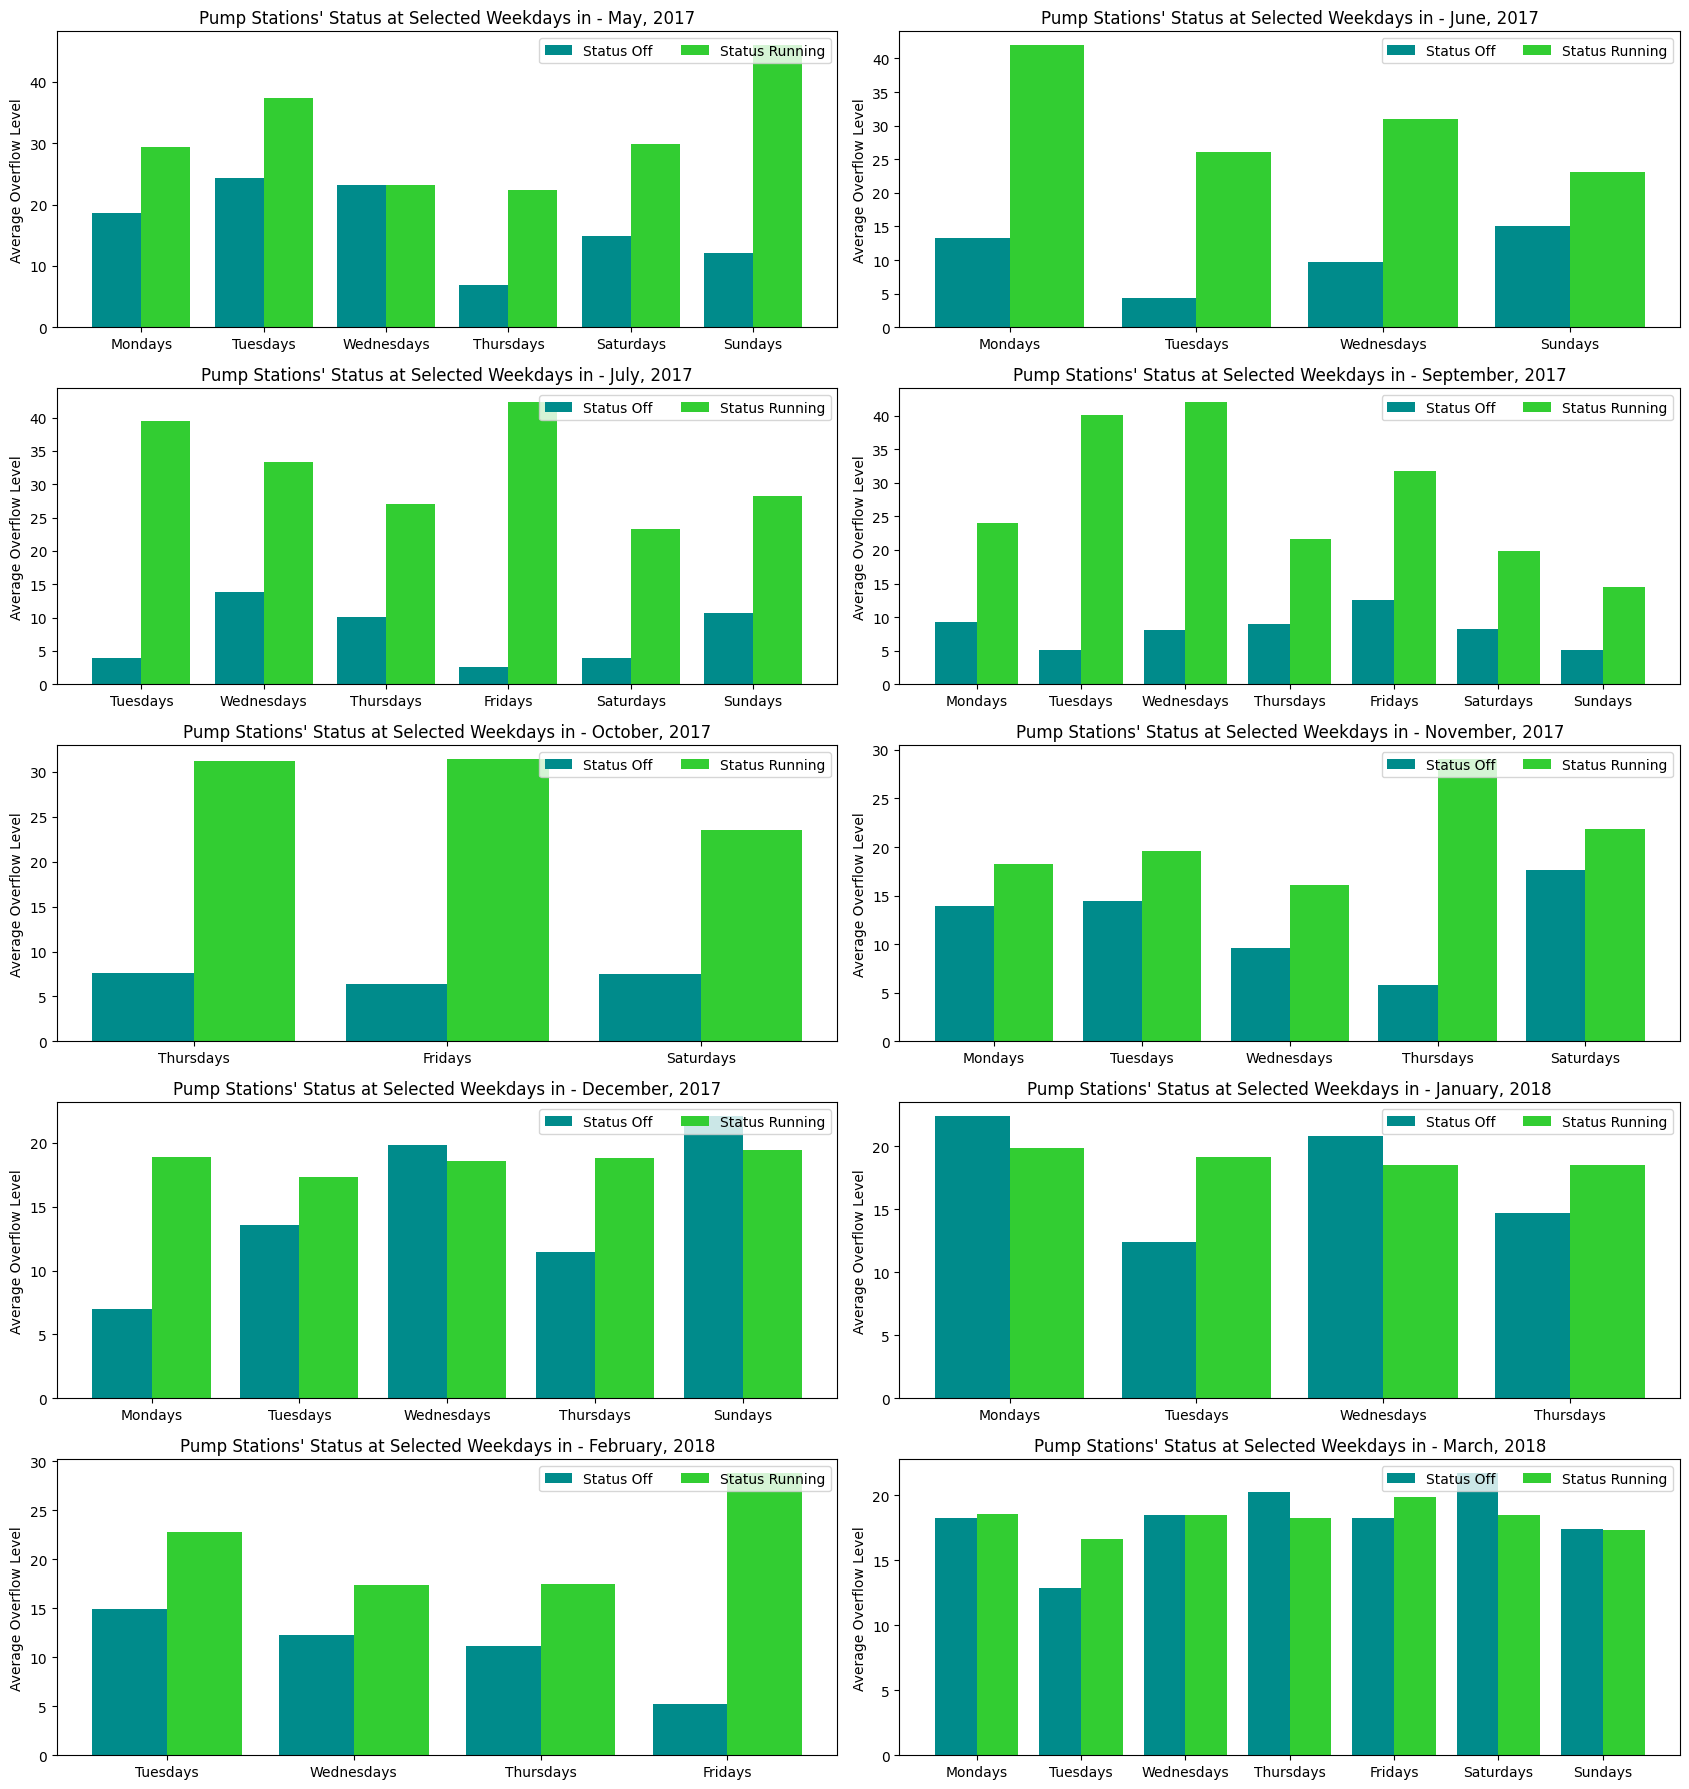

In [147]:
#This has a call to pumpStationsCmp so:  when pumpindex = 1 analysis in done only on StatusSpsa1. When it is 2 it is done on StatusSpsa1, otherwise on both
def compareStationsResults(pumpindex = 3):
    result = pumpStationsCmp(combnDataNew, pumpindex = pumpindex)
    levelOff = result.groupby(['Year','Month','Weekday'])['LevelOff'].aggregate(
                                                                 OffNum = 'count',
                                                                 LevelOff = 'mean',
                                                               ).reset_index()
    levelRunning = result.groupby(['Year','Month','Weekday'])['LevelRunning'].aggregate(
                                                                 RunningNum = 'count',
                                                                 LevelRunning = 'mean',
                                                               ).reset_index()
    plotdata = pd.merge(levelOff, levelRunning[["Year", "Month","Weekday","RunningNum" ,"LevelRunning"]], how="inner", on=["Year", "Month","Weekday"])
    vol = plotdata.groupby(['Year','Month'])['LevelRunning'].aggregate(
                                                                 Count = 'count',
                                                                 LevelRunning = 'mean',
                                                             ).reset_index()
    #generating plots
    counter = 0
    row = 0
    fig, ax = plt.subplots(5, 2)
    fig.set_figheight(18)
    fig.set_figwidth(17)
    #
    list_of_months = list(calendar.month_name)[1:]
    days_of_the_week = ['Mondays','Tuesdays','Wednesdays','Thursdays','Fridays','Saturdays','Sundays']
    bar_width  = 0.4 #, np.arange(len(hours))
    for index in vol['Month'].index.values :
        numrows = vol.iloc[[index]].values[0][2]
        year, month = int(vol.iloc[[index]].values[0][0]),int(vol.iloc[[index]].values[0][1])
        if (numrows > 2):
            data = plotdata.loc[  (plotdata['Year'] == year) & (plotdata['Month'] == month)  , ]
            xs = np.arange(data.shape[0])
            ax[row ,counter % 2].bar(xs - bar_width / 2 ,data['LevelOff'].values, bar_width ,label= 'Status Off',color='darkcyan')
            ax[row ,counter % 2].bar(xs + bar_width / 2 ,data['LevelRunning'].values, bar_width ,label= 'Status Running',color='limegreen')

            ax[row ,counter % 2].set_xticks(range(len(data['Weekday'].values)), [days_of_the_week[i] for i in data['Weekday'].values ] )
            ax[row ,counter % 2].set_ylabel('Average Overflow Level')
            
            ax[row ,counter % 2].legend(loc="upper right",ncol=2)
            ax[row,counter % 2].set_title('Pump Stations\' Status at Selected Weekdays in - ' + list_of_months[month - 1] + ', ' + str(year) )
            
            row = row + (0 if (counter % 2) == 0 else 1)
            counter = counter + 1
        #---
    fig.tight_layout()
compareStationsResults()

### Relationships between rainfall and caso data

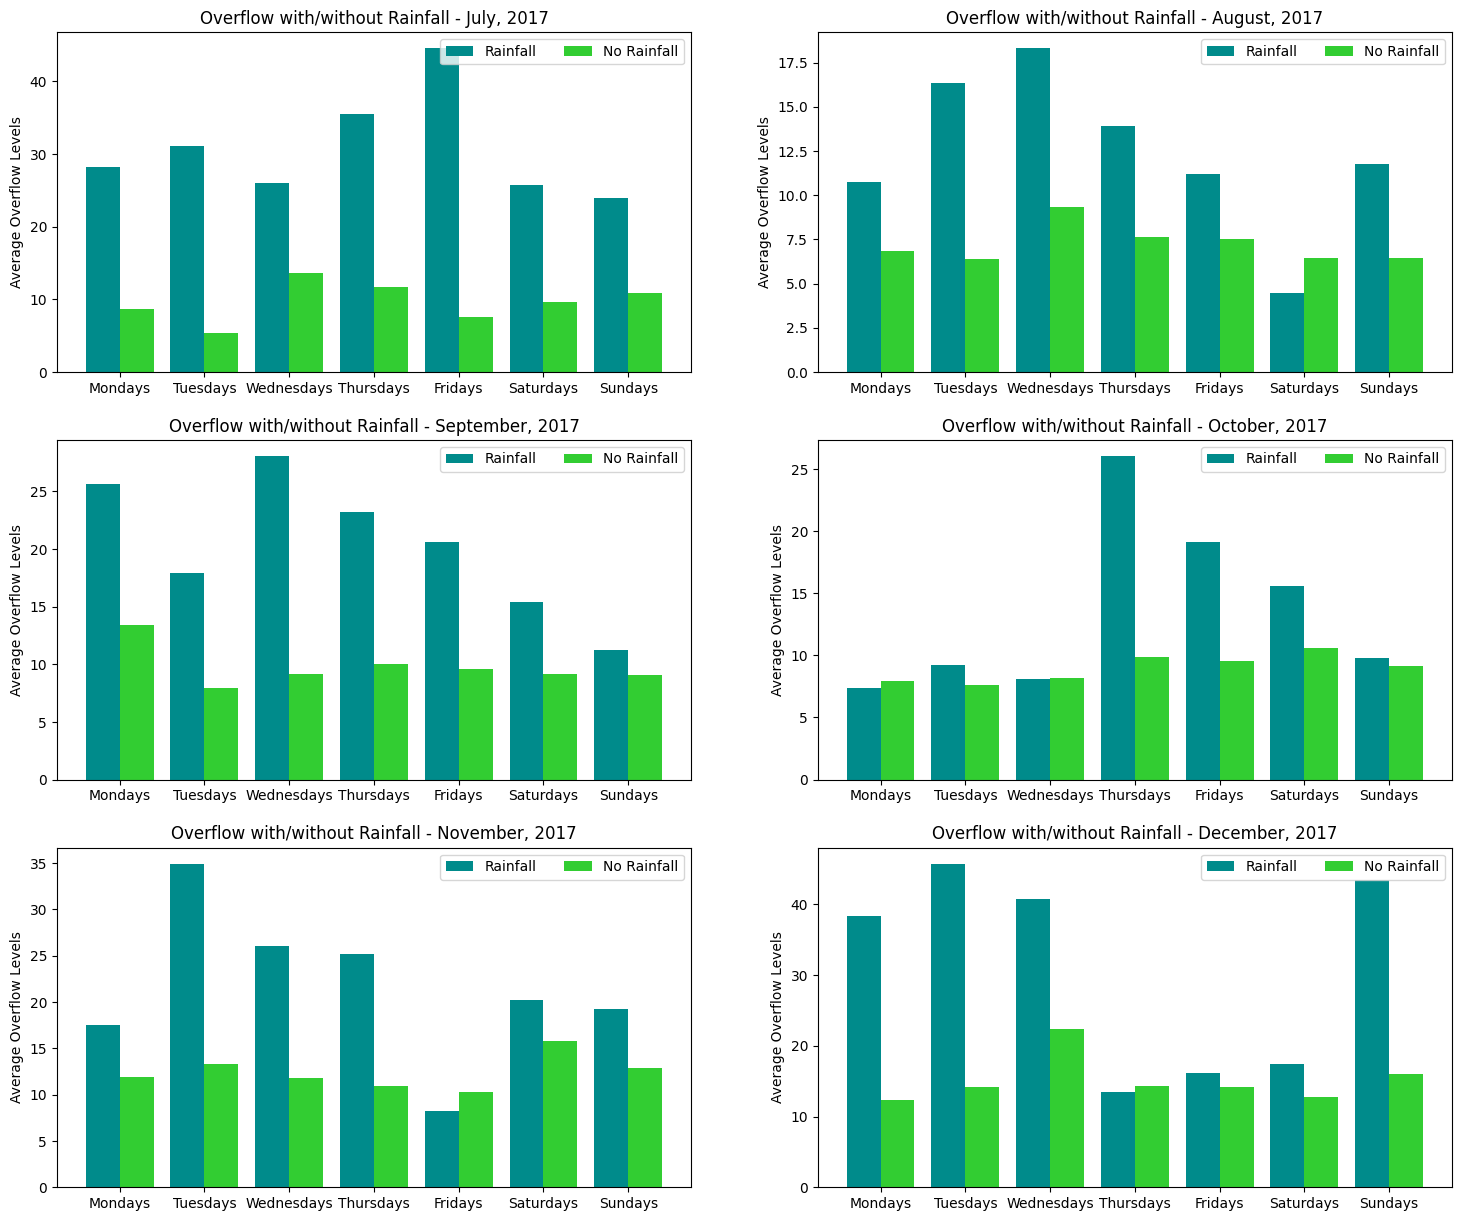

In [143]:
# comparing over flow levels when there is or isn't rainfall
list_of_months = list(calendar.month_name)[1:]

def rainfallByMonth(year = 2017): 
    temp = combnDataNew.loc[(pd.isnull(combnDataNew['RG_A_New']) == False) & (combnDataNew['Year'] == year) & (combnDataNew['Month'] != 6),['Month','Weekday','Hour','RG_A_New','Level'] ]
    temp['Rainfall'] = [1 if vl > 0 else 0 for vl in temp['RG_A_New'].values ] 
    temp = temp.groupby(['Month','Weekday','Rainfall'])['Level'].aggregate(
                                                                            OffNum = 'count',
                                                                            Level = 'mean',
                                                                          ).reset_index()
    # process 12 months for 2017
    if (year == 2017):
        fig, ax = plt.subplots(3, 2)
        fig.set_figheight(15)
        fig.set_figwidth(18)
        days_of_the_week = ['Mondays','Tuesdays','Wednesdays','Thursdays','Fridays','Saturdays','Sundays']
        counter = 0
        row = 0
        bar_width  = 0.4
        for month in temp['Month'].unique() :
            try:
                rainfalldata = temp.loc[  (temp['Month'] == month) & (temp['Rainfall'] == 1) , ]
                noRainfalldata = temp.loc[  (temp['Month'] == month) & (temp['Rainfall'] == 0) , ]          
                
                xs = np.arange(rainfalldata.shape[0])
                ax[row ,counter % 2].bar(xs - bar_width / 2 ,rainfalldata['Level'].values, bar_width ,label= 'Rainfall',color='darkcyan')
                ax[row ,counter % 2].bar(xs + bar_width / 2 ,noRainfalldata['Level'].values, bar_width ,label= 'No Rainfall',color='limegreen')
    
                ax[row ,counter % 2].set_xticks(range(len(rainfalldata['Weekday'].values)), [days_of_the_week[i] for i in rainfalldata['Weekday'].values  ] )
                ax[row ,counter % 2].set_ylabel('Average Overflow Levels')
                
                ax[row ,counter % 2].legend(loc="upper right",ncol=2)
                ax[row,counter % 2].set_title('Overflow with/without Rainfall - ' + list_of_months[month - 1] + ', ' + str(year) )           
                
                row = row + (0 if (counter % 2) == 0 else 1)
                counter = counter + 1
            except:
                continue
    else:        
        print('Process not implemented for 2018')
        #fig.set_figheight(20)
        #fig.set_figwidth(18)
        #counter = 0
        #row = 0
rainfallByMonth()

In [155]:
# Rainfall analysis
from scipy import stats

list_of_months = list(calendar.month_name)[1:]

def checkRainfallByMonth(year = 2017, minvalue = 0,usemean = True): 
    fig, ax = plt.subplots(5, 2)
    fig.set_figheight(20)
    fig.set_figwidth(18)
    counter = 0
    row = 0
    #col = 0
    
    for month in range(1,13):
        temp = combnDataNew.loc[(pd.isnull(combnDataNew['RG_A_New']) == False) &  (combnDataNew['RG_A_New'] > minvalue) &  (combnDataNew['Month'] == month),['Year','Month','Weekday','Hour','RG_A_New','Level'] ]
        numrows = temp.loc[  temp['Hour'] > 0   , :].shape[0]
        if (numrows > 4):        
            rgaMean = temp.groupby(['Year','Month','Weekday','Hour'])['RG_A_New'].aggregate(
                                                                                   MeanRG_A = 'mean' if usemean else 'sum',
                                                                                   ).reset_index()
            levels = temp.groupby(['Year','Month','Weekday','Hour'])['Level'].aggregate(
                                                                                   MeanLevel = 'mean',
                                                                                   ).reset_index()            
            temp = pd.merge(rgaMean, levels[["Year","Month","Weekday","Hour","MeanLevel"]], how="inner", on=["Year","Month","Weekday","Hour"])
            #rescale the y values between [0,1]
            meanRG_A = ((temp['MeanRG_A'] - temp['MeanRG_A'].min()) / temp['MeanRG_A'].max()).values
            meanLevel = ((temp['MeanLevel'] - temp['MeanLevel'].min()) / temp['MeanLevel'].max()).values
            slope, intercept, r, p, std_err = stats.linregress(meanRG_A, meanLevel)
            ## plotting          
            ax[row,counter % 2].scatter(meanRG_A, meanLevel, color = 'steelblue', marker = '*')
            ax[row,counter % 2].plot(meanRG_A, slope * meanRG_A + intercept, color='steelblue', linestyle='--', linewidth=2)
            ax[row ,counter % 2].set_ylabel('Overflow Level')
            ax[row ,counter % 2].set_xlabel('RG_A Value')
            string =  f'y = {round(slope,3)}x + {round(intercept,3)} ; r^2  = {round(r**2,3)}' 
            ax[row,counter % 2].set_title('Correlation for ' + list_of_months[month - 1] + ' 2017: ' + string )
            ##
            row = row + (0 if (counter % 2) == 0 else 1)
            counter = counter + 1 
    fig.tight_layout()

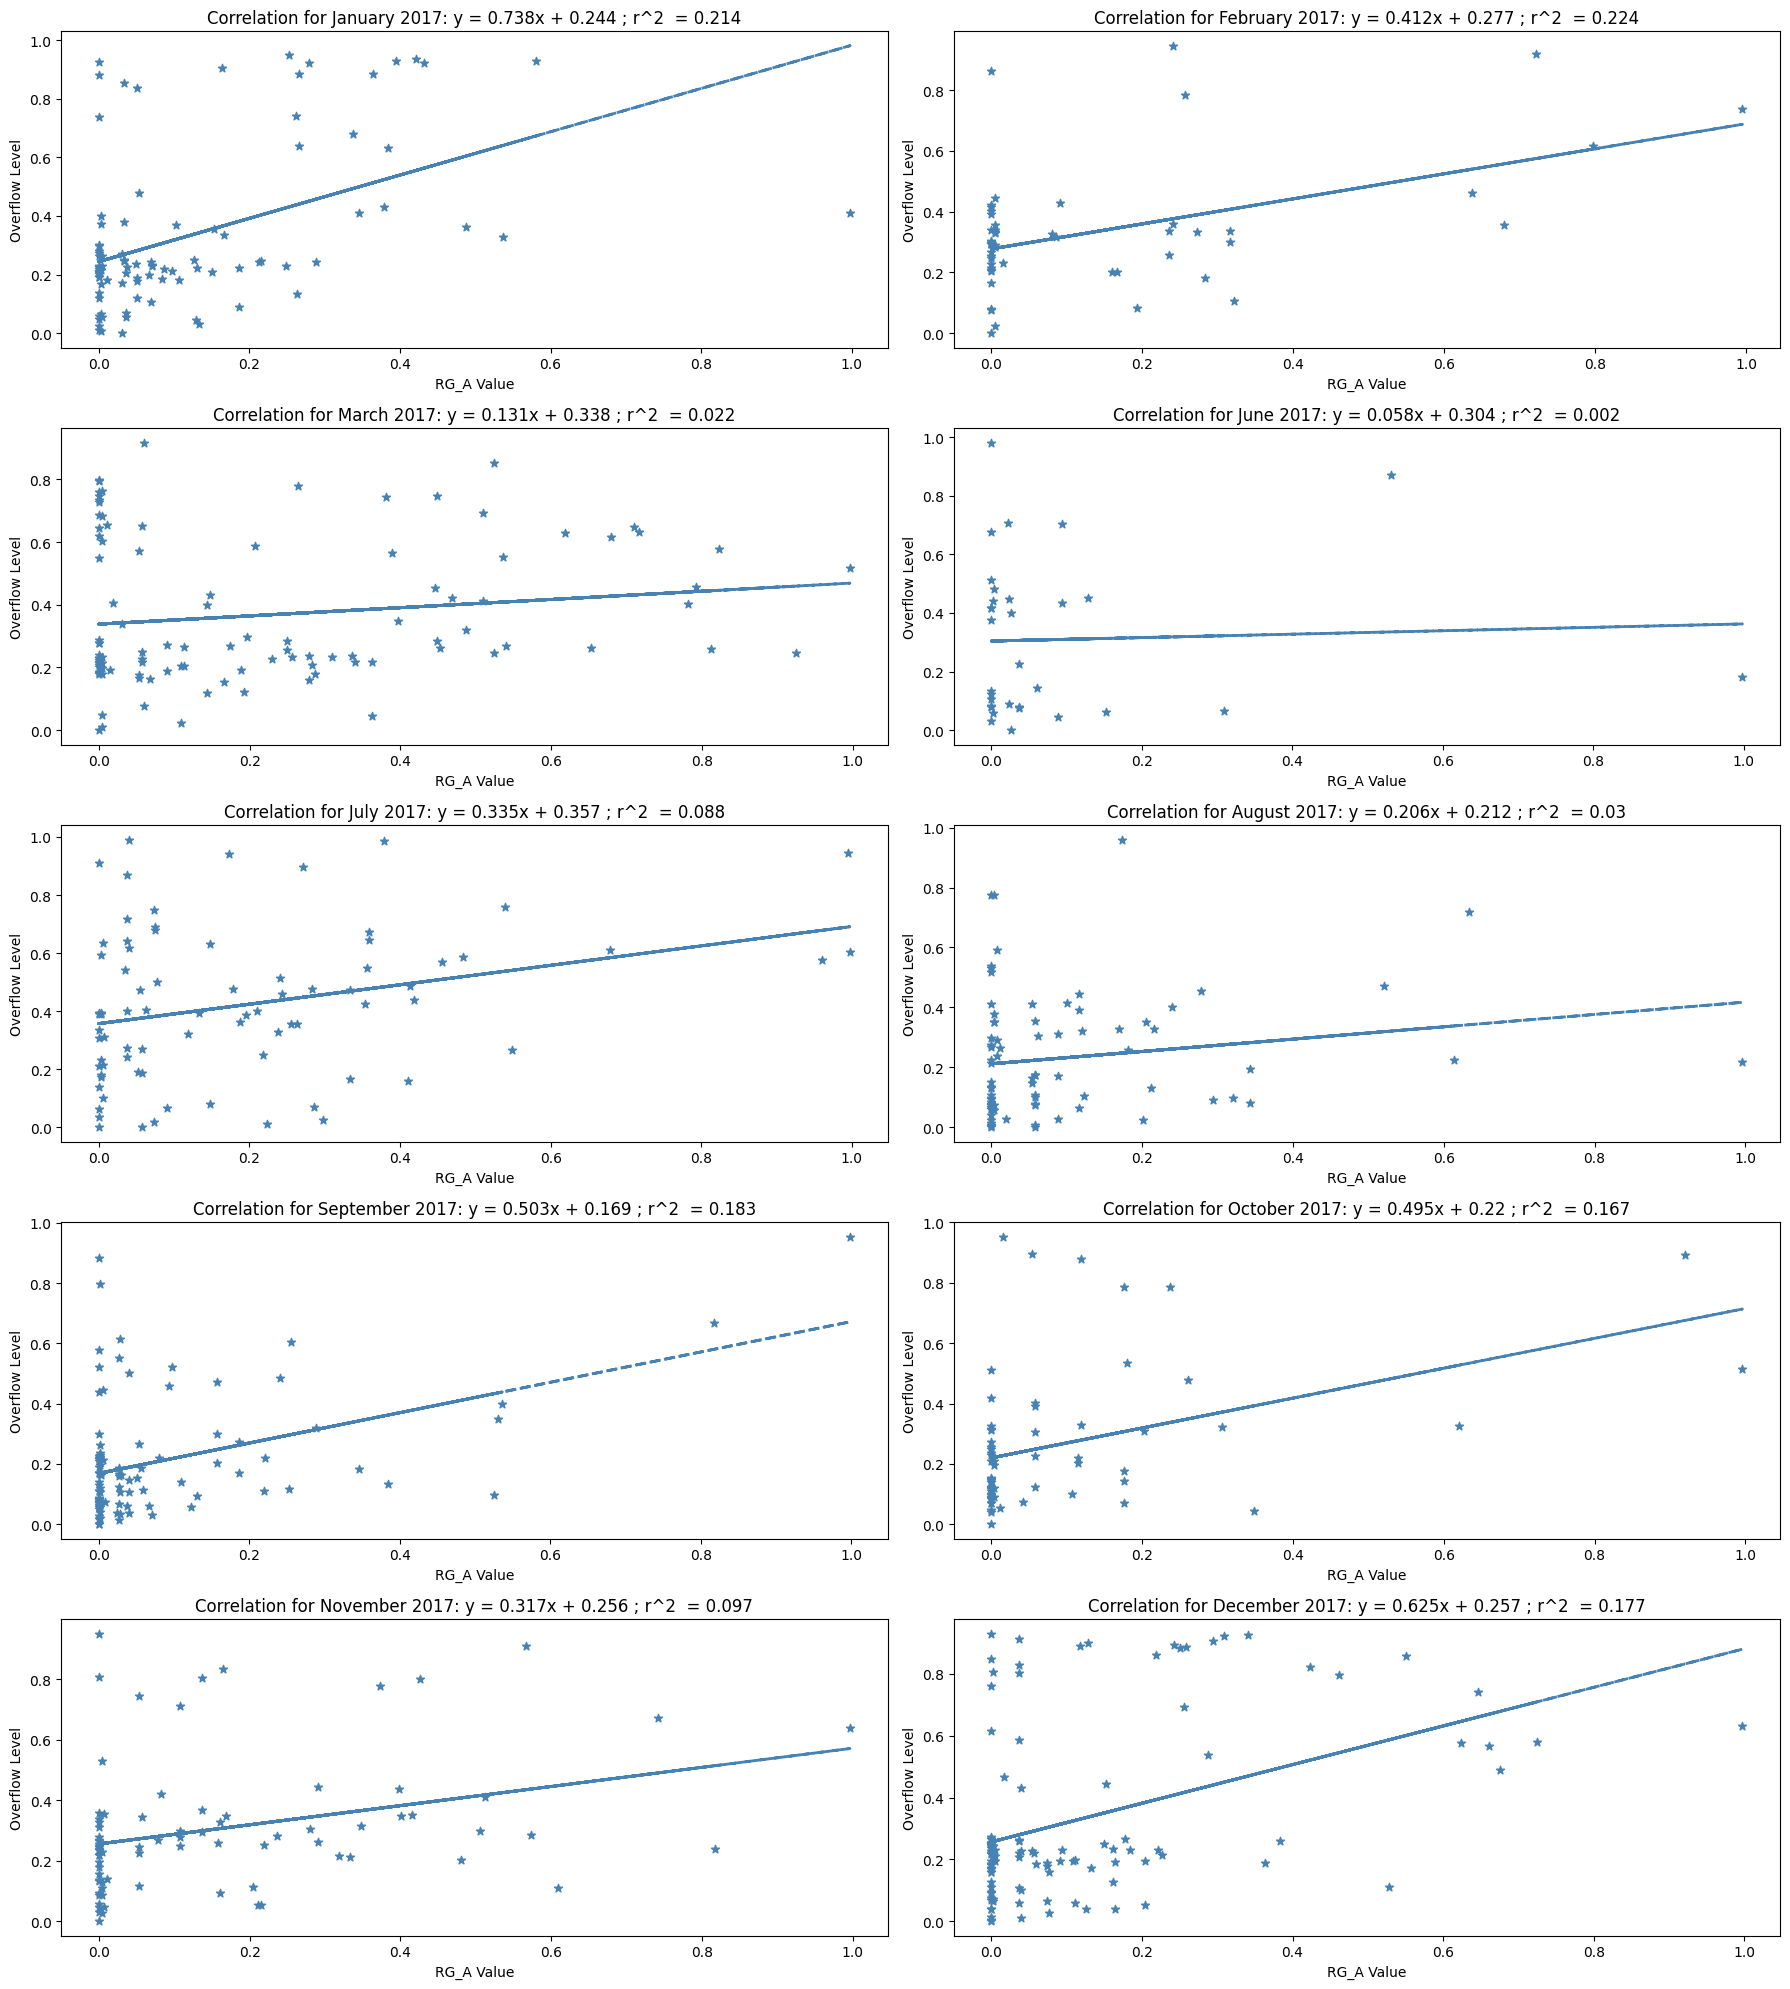

In [156]:
#Check all the data&  (combnDataNew['Month'] == 5)&  (combnDataNew['RG_A_New'] <= 0)
#combnDataNew.loc[(pd.isnull(combnDataNew['RG_A_New']) == False)  ,['Year','Month','Weekday','Hour','RG_A_New','Level'] ]
checkRainfallByMonth(usemean = False)

--------------------
Lots of repeated values can be seen around RG_A = 0.2 in the previous plots. Let's look at RG_A values greater than 2 and see if there is any improvement

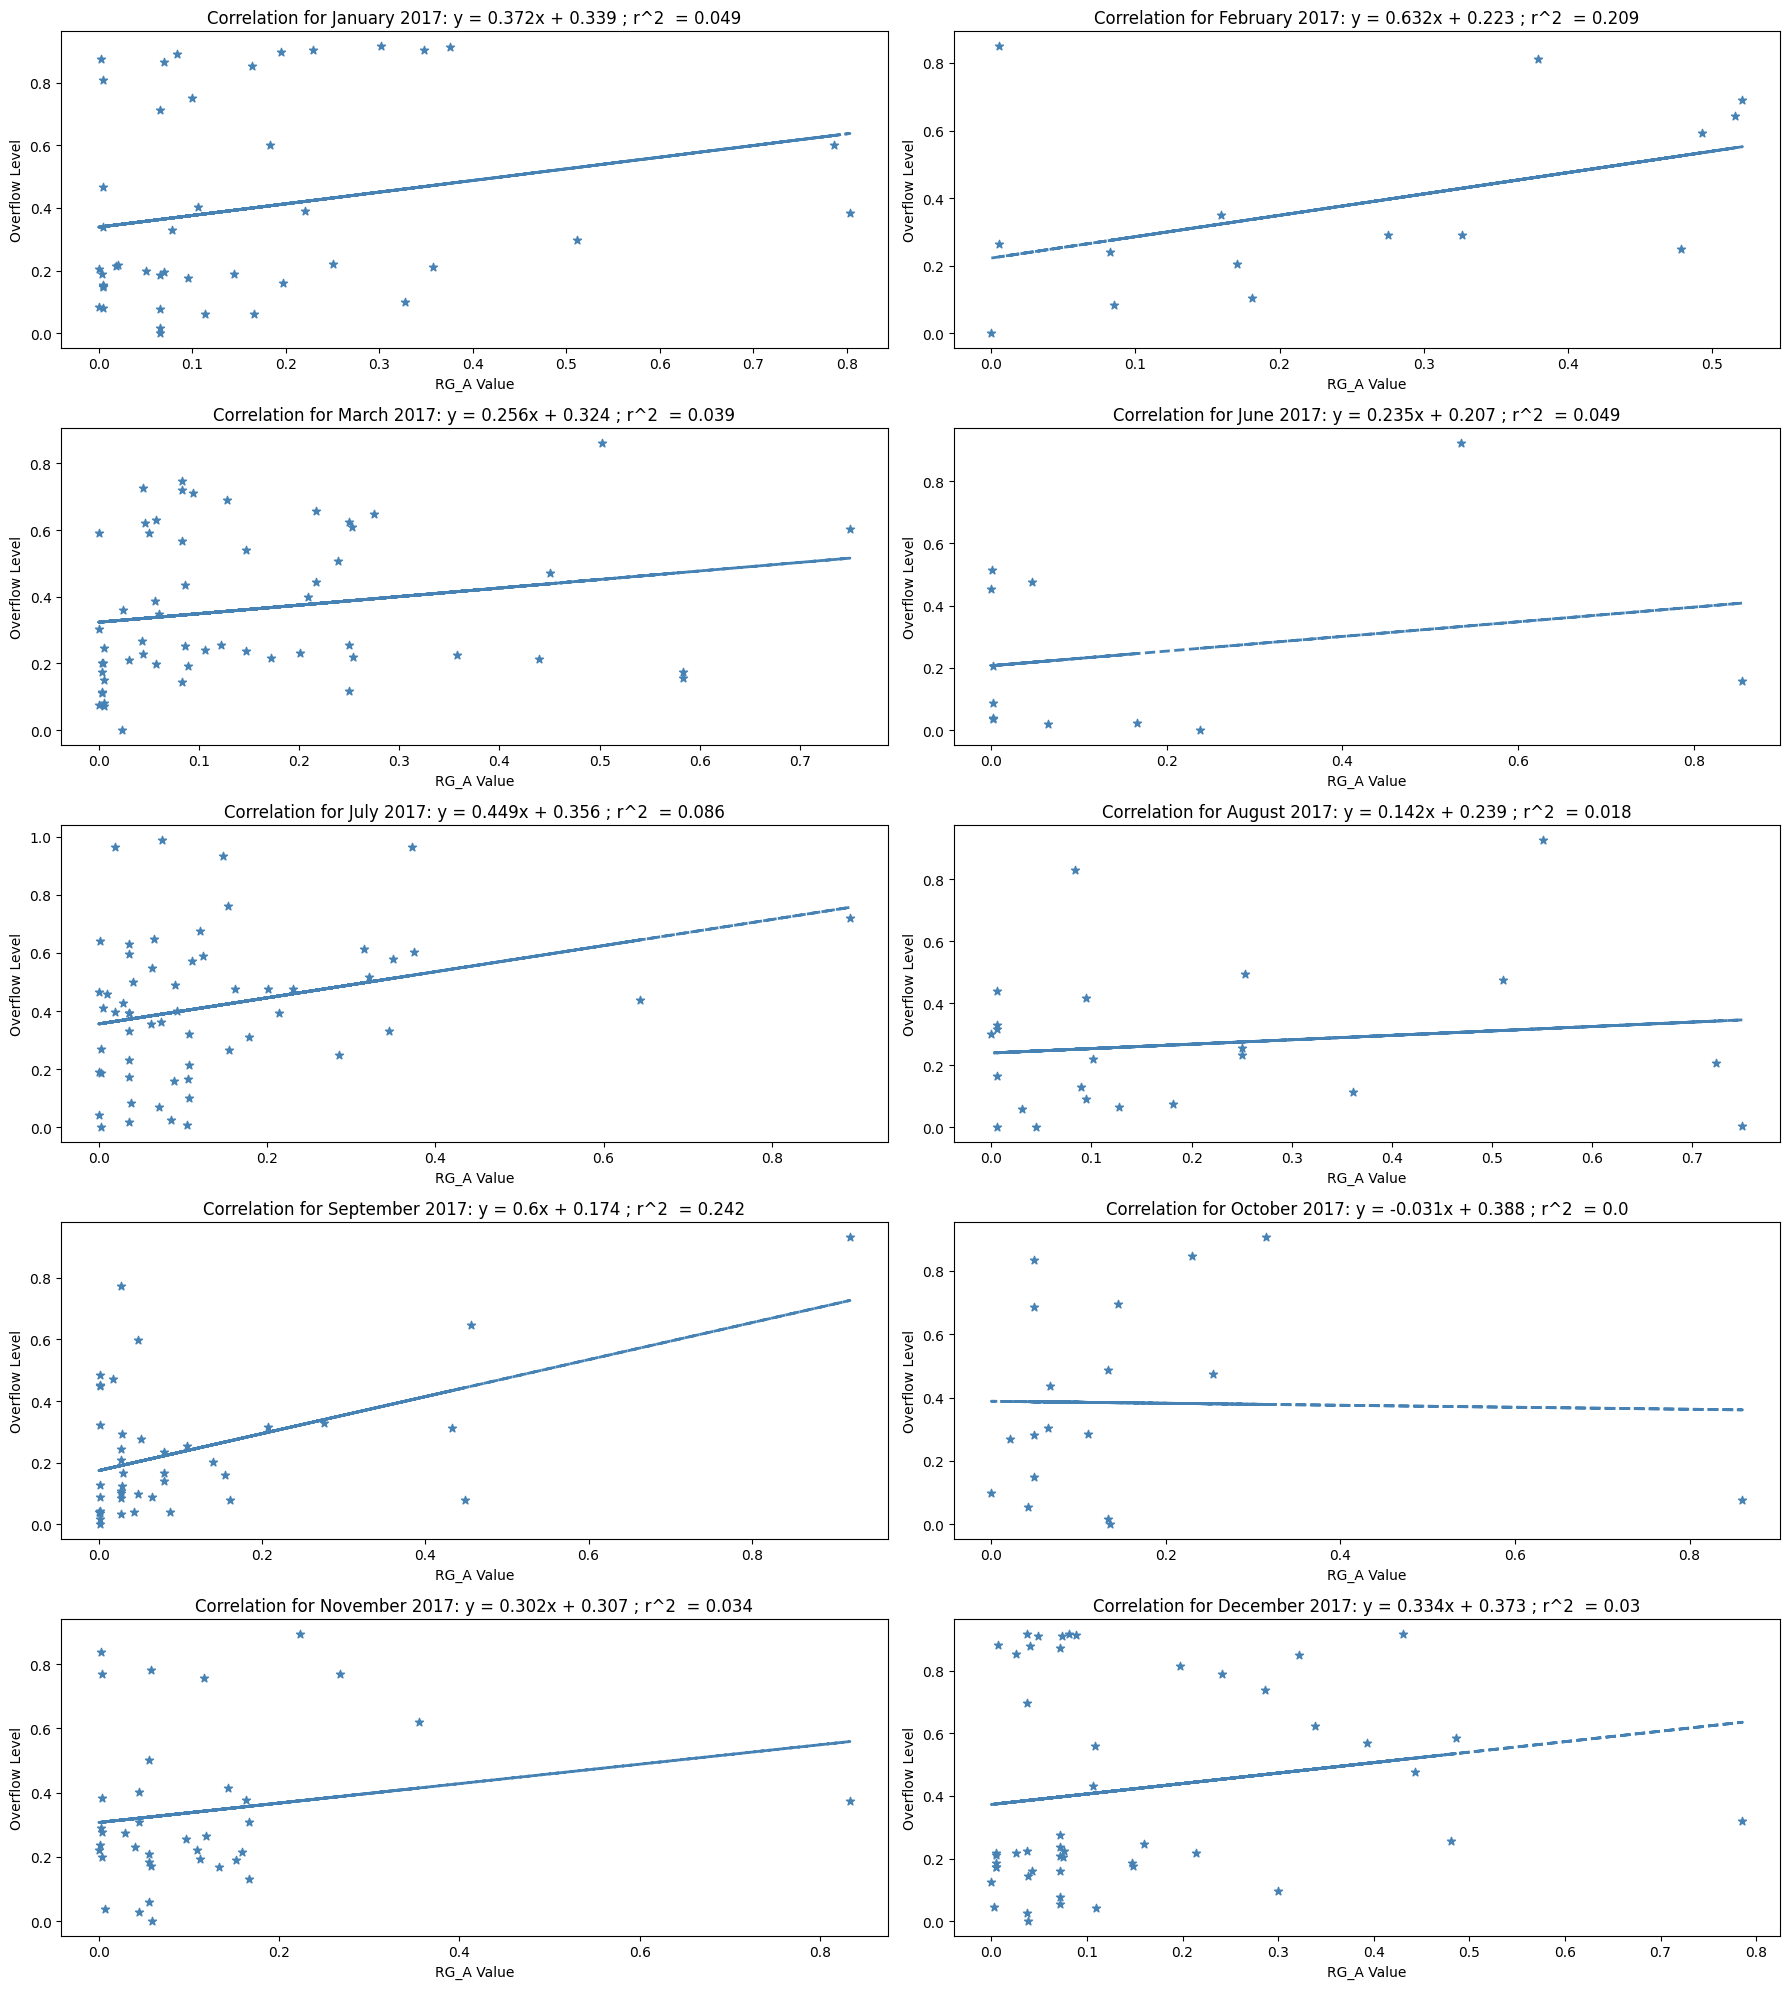

In [157]:
# lots of repeated values around 0.2. Let's remove those and see if there is any improvement
checkRainfallByMonth(minvalue = 0.2)